# Hypothesises

*   Player movement is driven by factors beyond club financial power or success, leading to transfers between clubs of varying financial means and performance levels.

*   Clubs that spends more fee and get higher fee from transfers involves more in transfer market interactions.

*   Heavy trader clubs become more successful in next season.



# Import Libraries

In [1]:
import pandas as pd
from google.colab import files
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
from collections import Counter
import numpy as np
from scipy import stats

# Helper Functions

In [2]:
def calculate_weight(fee):
  unit = ''.join(filter(str.isalpha, fee))
  value = None
  if unit == '':
    value = float(fee[1:])
  else:
    value  = fee[1:fee.find(unit)]
    if unit == 'm':
      value = float(value) * 1000000
    else:
      value = float(value) * 1000
  return value

def strip_text(element):
  return re.sub(r'\s+', '', element.text)

def get_standing(url):
  headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
    "Accept-Language": "en-US,en;q=0.5",
    "Referer": "https://www.transfermarkt.com/"
  }
  session = requests.Session()
  res = session.get(url, headers=headers)
  soup  = BeautifulSoup(res.text,'html.parser')
  table_container = soup.find('div', {'class': 'responsive-table'})
  table = table_container.find('table',{'class':'items'}).find('tbody').find_all('tr')

  standing_list = []
  for tr in table:
    tds = tr.find_all('td')
    try:
      position,name,points = int(strip_text(tds[0])),tds[2].text.replace('\n',''),int(strip_text(tds[9]))
      standing_list.append((position,name,points))
    except:
      pass
  session.close()
  return standing_list

def visualize_degree_centrality(degree_centralities):
  plt.figure(figsize=(8, 4))

  plt.bar(degree_centralities.keys(), degree_centralities.values(), color='skyblue')
  plt.xlabel('')
  plt.ylabel('Degree Centrality')
  plt.title('Degree Centrality Distribution')

  plt.xticks([])

  plt.tight_layout()
  plt.show()

def visualize_betweenness_centrality(betweenness_centralities):
  plt.figure(figsize=(8, 4))

  plt.bar(betweenness_centralities.keys(), betweenness_centralities.values(), color='lightgreen')
  plt.xlabel('')
  plt.ylabel('Betweenness Centrality')
  plt.title('Betweenness Centrality Distribution')

  plt.xticks([])

  plt.tight_layout()
  plt.show()

def greater_dict(degrees,threshold):
  return {key: value for key, value in degrees.items() if value > threshold}

def sort_dict(degrees,desc=True):
  return dict(sorted(degrees.items(), key=lambda x: x[1], reverse=desc))

def get_team_season_diff(df,season,team_name):
  curr_season = season
  next_season = season + 1

  curr_df = df[df['season'] == curr_season]
  next_df = df[df['season'] == next_season]

  check = False
  diffs = None

  if team_name in curr_df['team_name'].values and team_name in next_df['team_name'].values:
    curr_season,next_season = curr_df[curr_df['team_name'] == team_name],next_df[next_df['team_name'] == team_name]

    curr_pos,next_pos = int(curr_season['position'].values[0]),int(next_season['position'].values[0])
    curr_points,next_points = int(curr_season['points'].values[0]),int(next_season['points'].values[0])

    diffs = (next_pos-curr_pos,next_points-curr_points)
    check = True

  return check, diffs

# Scrape Standing Tables & Form Standing Db

In [ ]:
# premier-league"https://www.transfermarkt.com/premier-league/tabelle/wettbewerb/GB1?saison_id=2019"
# ligue-1 "https://www.transfermarkt.com/ligue-1/tabelle/wettbewerb/FR1?saison_id=2017"
# bundesliga - https://www.transfermarkt.com/bundesliga/tabelle/wettbewerb/L1?saison_id=2019
# serie a - https://www.transfermarkt.com/serie-a/tabelle/wettbewerb/IT1?saison_id=2019
# eredivisie - https://www.transfermarkt.com/eredivisie/tabelle/wettbewerb/NL1?saison_id=2019
# liga nos - https://www.transfermarkt.com/liga-portugal/tabelle/wettbewerb/PO1?saison_id=2019
# la liga - https://www.transfermarkt.com/laliga/tabelle/wettbewerb/ES1?saison_id=2019

#leagues = [('premier-league','GB1','Premier League'),
#           ('ligue-1','FR1','Ligue 1'),
#           ('bundesliga','L1','1 Bundesliga'),
#           ('serie-a','IT1', 'Serie A'),
#           ('eredivisie','NL1', 'Eredivisie'),
#           ('liga-portugal','PO1','Liga Nos'),
#           ('laliga','ES1','Primera Division')
#          ]
#error_seasons = []
#with open('standings.txt', 'w') as file:
#  for season in range(1995,2023):
#    print('SEASON -',season)
#    print('*'*50)
#    check = False
#    for league,id,name in leagues:
#      if not check:
#        print(name)
#        print('-'*len(league))
#        url = 'https://www.transfermarkt.com/{}/tabelle/wettbewerb/{}?saison_id={}'.format(league,id,season)
#        print('url:',url)
#        standing = get_standing(url)
#        if len(standing) < 5:
#          check = True
#        else:
#          for s in standing:
#            #position,team_name,points,league_name,season
#           file.write(f"{s[0]}|{s[1]}|{s[2]}|{name}|{season}\n")

#    if check:
#      error_seasons.append(season)
#print('Error in seasons:', error_seasons)

SEASON - 1995
**************************************************
Premier League
--------------
url: https://www.transfermarkt.com/premier-league/tabelle/wettbewerb/GB1?saison_id=1995
Ligue 1
-------
url: https://www.transfermarkt.com/ligue-1/tabelle/wettbewerb/FR1?saison_id=1995
1 Bundesliga
----------
url: https://www.transfermarkt.com/bundesliga/tabelle/wettbewerb/L1?saison_id=1995
Serie A
-------
url: https://www.transfermarkt.com/serie-a/tabelle/wettbewerb/IT1?saison_id=1995
Eredivisie
----------
url: https://www.transfermarkt.com/eredivisie/tabelle/wettbewerb/NL1?saison_id=1995
Liga Nos
-------------
url: https://www.transfermarkt.com/liga-portugal/tabelle/wettbewerb/PO1?saison_id=1995
Primera Division
------
url: https://www.transfermarkt.com/laliga/tabelle/wettbewerb/ES1?saison_id=1995
SEASON - 1996
**************************************************
Premier League
--------------
url: https://www.transfermarkt.com/premier-league/tabelle/wettbewerb/GB1?saison_id=1996
Ligue 1
-----

In [ ]:
#data = []

#with open('standings.txt', 'r') as file:
#  for line in file:
#    items = line.strip().split('|')
#    pos,team,points,league,season = items
#    data.append([int(pos),team,int(points),league,int(season)])

#columns = ['position', 'team_name', 'points', 'league_name', 'season']

#standing_df = pd.DataFrame(data, columns=columns)
#standing_df.to_csv('standings.csv', index=False)
#files.download('standings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#df_england = pd.read_csv('premier-league.csv')
#df_france = pd.read_csv('ligue-1.csv')
#df_germany = pd.read_csv('1-bundesliga.csv')
#df_italy = pd.read_csv('serie-a.csv')
#df_netherlands = pd.read_csv('eredivisie.csv')
#df_portugal = pd.read_csv('liga-nos.csv')
#df_spain = pd.read_csv('primera-division.csv')

#print('england',df_england.shape)
#print('france',df_france.shape)
#print('germany',df_germany.shape)
#print('italy',df_italy.shape)
#print('netherlands',df_netherlands.shape)
#print('portugal',df_portugal.shape)
#print('spain',df_spain.shape)

#merged_df = pd.concat([df_england,
#                       df_france,
#                       df_germany,
#                       df_italy,
#                       df_netherlands,
#                       df_portugal,
#                       df_spain], ignore_index=True)
#merged_df.to_csv('data.csv', index=False)
#files.download('data.csv')

# Clear & Filter Data of Transfers

*   Combine CSV files



In [3]:
df = pd.read_csv('data.csv')

*   Drop Columns

In [4]:
df.drop(columns=['age', 'position', 'fee_cleaned', 'country'], inplace=True)
df.head(10)

club_name       player_name club_involved_name            fee  \
0  Middlesbrough FC      Tommy Wright          Leicester        €910Th.   
1  Middlesbrough FC  Jonathan Gittens        Southampton        €250Th.   
2  Middlesbrough FC      Chris Morris             Celtic              ?   
3  Middlesbrough FC       Ben Roberts           Boro U18              -   
4  Middlesbrough FC         Andy Todd           Boro U18              -   
5  Middlesbrough FC     Stuart Ripley          Blackburn         €2.00m   
6  Middlesbrough FC    Gary Parkinson    Southend United  loan transfer   
7  Middlesbrough FC     Bernie Slaven          Port Vale              ?   
8  Middlesbrough FC       Andy Payton             Celtic              ?   
9  Middlesbrough FC        Ian Arnold    Carlisle United              ?   

  transfer_movement transfer_period     league_name  year     season  
0                in          Summer  Premier League  1992  1992/1993  
1                in          Summer  Premier League  1992  1992/1993  
2                in          Summer  Premier League  1992  1992/1993  
3                in          Summer  Premier League  1992  1992/1993  
4                in          Summer  Premier League  1992  1992/1993  
5               out          Summer  Premier League  1992  1992/1993  
6               out          Summer  Premier League  1992  1992/1993  
7               out          Summer  Premier League  1992  1992/1993  
8               out          Summer  Premier League  1992  1992/1993  
9               out          Summer  Premier League  1992  1992/1993

*   Filter Data
1.  Get Summer Transfer Window
2.  Fees with Money

In [5]:
min_year = df['year'].min()
max_year = df['year'].max()

print(f"Minimum year: {min_year}")
print(f"Maximum year: {max_year}")
print(f"Shape: {df.shape}")

Minimum year: 1992
Maximum year: 2022
Shape: (138224, 9)


In [6]:
df = df[df['transfer_period'] == 'Summer']
df = df[~df['year'].isin([1992,1993,1994])]
df = df.reset_index(drop=True)

In [7]:
min_year = df['year'].min()
max_year = df['year'].max()

print(f"Minimum year: {min_year}")
print(f"Maximum year: {max_year}")
print(f"Shape: {df.shape}")

Minimum year: 1995
Maximum year: 2022
Shape: (102540, 9)


In [8]:
df['fee'] = df['fee'].astype(str)
df['fee'] = df['fee'].replace('free transfer', '€0')

In [9]:
df = df[(~df['fee'].str.lower().str.contains('loan') & (df['fee'] != '?') & (df['fee'] != '-'))]
df = df[df['fee'].str.startswith('€')]
df['fee_value'] = df['fee'].apply(calculate_weight)

In [10]:
print("Shape:",df.shape)
print("Columns:",df.columns)
df.head()

Shape: (40191, 10)
Columns: Index(['club_name', 'player_name', 'club_involved_name', 'fee',
       'transfer_movement', 'transfer_period', 'league_name', 'year', 'season',
       'fee_value'],
      dtype='object')


club_name      player_name club_involved_name      fee transfer_movement  \
0   Arsenal FC  Dennis Bergkamp              Inter  €11.25m                in   
1   Arsenal FC      David Platt          Sampdoria   €7.10m                in   
6   Arsenal FC   Stefan Schwarz         Fiorentina   €2.20m               out   
7   Arsenal FC     Jimmy Carter         Portsmouth       €0               out   
11  Chelsea FC      Mark Hughes            Man Utd   €1.90m                in   

   transfer_period     league_name  year     season   fee_value  
0           Summer  Premier League  1995  1995/1996  11250000.0  
1           Summer  Premier League  1995  1995/1996   7100000.0  
6           Summer  Premier League  1995  1995/1996   2200000.0  
7           Summer  Premier League  1995  1995/1996         0.0  
11          Summer  Premier League  1995  1995/1996   1900000.0

# Construct Network
*   **Form weighted network dictionary data**
1.  Source: buyer
2.  Sink: seller
3.  Weight: fee

*   **Link weight between 2 teams is equal to the total weight of all traded players between them**

*   **Strength s(i) of a team can be obtained by a summation of the in- and out-transfer weights**

In [11]:
class TransferNetwork:
  def __init__(self, transfer_df):
    # Gary Megson club_name: Norwich City club_involved_name: Man City transfer_movement: in
    # Transferred from Man City to Norwich City
    grouped_df = transfer_df.groupby(['club_name', 'club_involved_name','transfer_movement'])['fee_value'].sum().reset_index()

    net = nx.DiGraph()
    for index, row in grouped_df.iterrows():
      source = row['club_name'] if row['transfer_movement'] == 'in' else row['club_involved_name']
      sink = row['club_involved_name'] if row['transfer_movement'] == 'in' else row['club_name']
      weight = row['fee_value']
      if weight == 0:
        weight = 1
      net.add_edge(source, sink, weight=weight)

    self.net = net


  def nodes_and_edges(self):
    nodes = self.net.nodes()
    edges = self.net.edges()
    print("Nodes of the graph:", nodes)
    print("Edges of the graph:", edges)
    print("Total number of nodes:", len(nodes))
    print("Total number of edges:", len(edges))
    return nodes,edges

  def draw_network(self):
    # visualize with Gephi
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(self.net)  # Position nodes using the spring layout algorithm

    # Draw nodes
    nx.draw_networkx_nodes(self.net, pos, node_size=200, node_color='skyblue')

    # Normalize edge weights
    edges = self.net.edges(data=True)
    weights = [data['weight'] for _, _, data in edges]
    min_weight = min(weights)
    max_weight = max(weights)
    normalized_weights = [((weight - min_weight) / (max_weight - min_weight) * 49) + 1 for weight in weights]  # Scale to a range [1, 50]

    # Draw edges with normalized weights as thickness
    nx.draw_networkx_edges(self.net, pos, edgelist=edges, width=normalized_weights)

    # Draw labels
    #nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

    # Edge labels (optional, to display weights)
    edge_labels = {(u, v): f"{data['weight']}" for u, v, data in edges}
    nx.draw_networkx_edge_labels(self.net, pos, edge_labels=edge_labels, font_size=10)
    plt.title('Weighted Directed Club Transfer Network')
    plt.show()

  def measure_centrality(self):
    # degree centrality
    degree_centralities = nx.degree_centrality(self.net)

    # betweenness centrality
    betweenness_centralities = nx.betweenness_centrality(self.net, weight='weight')

    return degree_centralities,betweenness_centralities

  def in_out_degrees(self):
    in_degrees = dict(self.net.in_degree())
    out_degrees = dict(self.net.out_degree())
    return in_degrees,out_degrees

  def in_degree_dist(self,in_degrees):
    in_degree_counts = Counter(in_degrees.values())
    plt.figure(figsize=(8, 6))

    plt.bar(list(in_degree_counts.keys()), list(in_degree_counts.values()), color='skyblue')
    plt.xlabel('In-Degree')
    plt.ylabel('Frequency')
    plt.title('In-Degree Distribution (Frequency)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

  def out_degree_dist(self,out_degrees):
    out_degree_counts = Counter(out_degrees.values())
    plt.figure(figsize=(8, 6))

    plt.bar(list(out_degree_counts.keys()), list(out_degree_counts.values()), color='lightgreen')
    plt.xlabel('Out-Degree')
    plt.ylabel('Frequency')
    plt.title('Out-Degree Distribution (Frequency)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

  def node_strengths(self):
    degrees_dict = {}
    adjacency = self.net.adjacency()

    for node, neighbors in adjacency:

      in_weight = 0
      out_weight = 0
      for neighbor, edge_data in neighbors.items():
        weight = edge_data.get('weight', 1)  # Default weight to 1 if not present
        if neighbor == node:  # Skip self-loops
          continue
        in_weight += weight if node != neighbor else 0  # Add weight for incoming edges
        out_weight += weight
      degrees_dict[node] = (in_weight, out_weight)
    return {team:sum(weights) for team,weights in degrees_dict.items()}

  def analyze_assortativeness(self):
    edge_degrees = [[self.net.degree(u), self.net.degree(v)] for u, v in self.net.edges()]

    plt.figure(figsize=(10, 8))
    sns.heatmap(edge_degrees, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar_kws={'label': 'Degree'})

    plt.title('Transfer Network- Degree Heatmap for Edge Nodes')
    plt.xlabel("Node 1")
    plt.ylabel("Node 2")

    plt.show()

    assortativity_coefficient = nx.degree_assortativity_coefficient(self.net)
    print("Assortativity coefficient:", assortativity_coefficient)
    if assortativity_coefficient < 0:
      print("The network is disassortative")
    else:
      print("The network is assortative")

  def export_gexf(self):
    nx.write_gexf(self.net, "transfer_network.gexf")



transfer_net = TransferNetwork(df)

# Visualization with Gephi

*   **Network is exported in format 'gexf', visualized with gephi and transformed to format 'png'.**

In [12]:
transfer_net.export_gexf()

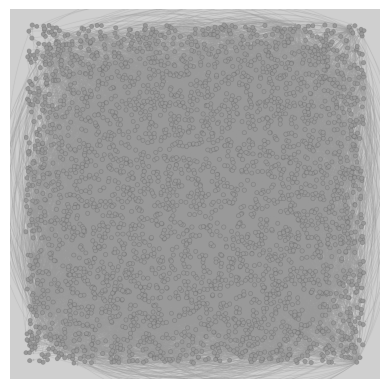

In [13]:
img = mpimg.imread('transfer_network.png')
plt.imshow(img)
plt.axis('off')
plt.show()

#Analyze Network

Nodes of the graph: ['1. FC Köln', "1.FC K'lautern", '1.FC Nuremberg', '1.FSV Mainz 05', '1860 Munich', 'Aarhus GF', 'Ajax', 'Al-Ahli (UAE)', 'Alem. Aachen', 'Altinordu', 'Amiens SC', 'Anorthosis', 'Atlético Madrid', 'Austria Vienna', 'B. Dortmund II', 'Bahman', 'Barcelona', 'Bay. Leverkusen', 'Bayern Munich', 'Benfica', 'Birmingham', 'Bor. Dortmund', 'Braga U19', 'Bröndby IF', 'CSKA Sofia', 'Cercle Brugge', 'Chemnitzer FC', 'Darmstadt 98', 'Dinamo Tbilisi', 'E. Braunschweig', 'E. Frankfurt', 'FC 08 Homburg', 'FC Augsburg', 'FC Copenhagen', 'FC Gütersloh', 'FC Ingolstadt', 'FC Schalke 04', 'FC St. Gallen', 'Fenerbahce', 'Feyenoord', 'Flamurtari FC', 'Fulham', 'Fulham Res.', 'G. Bordeaux', 'Getafe', 'Greuther Fürth', 'Górnik Zabrze', 'HNK Rijeka', 'Hajduk Split', 'Hamburger SV', 'Hamburger SV II', 'Hannover 96', 'Hapoel Tel Aviv', 'Hertha BSC', 'Holstein Kiel', 'Iraklis', 'Juventus', 'K. Offenbach', 'KAA Gent', 'KFC Uerdingen', 'KV Oostende', 'Karlsruhe II', 'Karlsruher SC', 'LOSC Lille

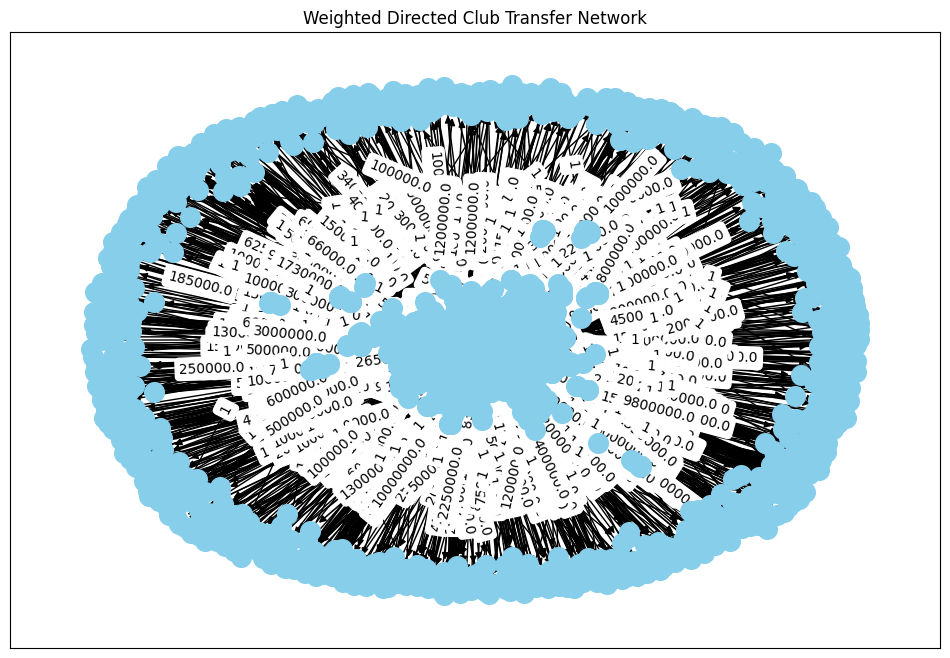

In [14]:
transfer_net.nodes_and_edges()
transfer_net.draw_network()

*   **Centrality measures of the network are calculated.**

In [15]:
degree_centralities,betweenness_centralities = transfer_net.measure_centrality()
deg_centrality,between_centrality = sort_dict(degree_centralities),sort_dict(betweenness_centralities)
print("Degree Centrality;",deg_centrality)
print("Betweenness Centrality:",between_centrality)

Degree Centrality; {'Sporting CP': 0.0971151099685804, 'FC Porto': 0.08883176235361326, 'AS Roma': 0.08797486432447872, 'Udinese Calcio': 0.08340474150242788, 'VfL Wolfsburg': 0.07826335332762067, 'SL Benfica': 0.07769208797486432, 'Sevilla FC': 0.07712082262210797, 'Hamburger SV': 0.07654955726935161, 'SC Braga': 0.07512139388746072, 'PSV Eindhoven': 0.07169380177092259, 'LOSC Lille': 0.07083690374178805, 'AC Milan': 0.07055127106540988, 'FC Schalke 04': 0.06940874035989718, 'VfB Stuttgart': 0.06798057697800629, 'Olympique Lyon': 0.06740931162524993, 'OGC Nice': 0.06712367894887175, 'SS Lazio': 0.06455298486146815, 'Aston Villa': 0.0639817195087118, 'Genoa CFC': 0.0639817195087118, 'Hertha BSC': 0.06369608683233362, 'Juventus FC': 0.06341045415595543, 'Atalanta BC': 0.06312482147957726, 'Liverpool FC': 0.06312482147957726, 'Olympique Marseille': 0.06312482147957726, 'SC Heerenveen': 0.06283918880319908, 'SSC Napoli': 0.060268494715795484, 'AS Monaco': 0.05969722936303913, 'UC Sampdori

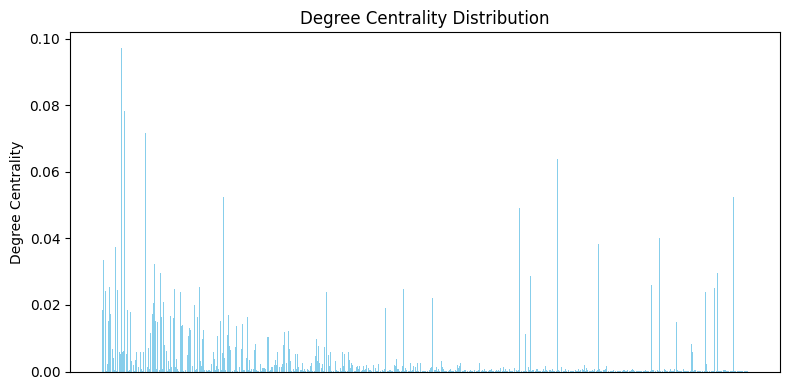

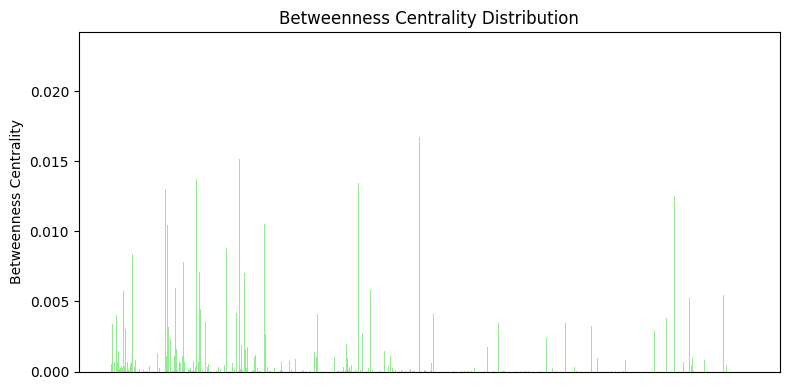

In [16]:
visualize_degree_centrality(degree_centralities)
visualize_betweenness_centrality(betweenness_centralities)

In [17]:
in_degrees, out_degrees = transfer_net.in_out_degrees()
print("In Degrees by node:",sort_dict(in_degrees))
print("Out Degrees by node:",sort_dict(out_degrees))

In Degrees by node: {'Sporting CP': 199, 'FC Porto': 176, 'AS Roma': 161, 'AC Milan': 147, 'SL Benfica': 146, 'SC Braga': 145, 'Udinese Calcio': 144, 'Olympique Lyon': 144, 'Hamburger SV': 139, 'PSV Eindhoven': 136, 'VfL Wolfsburg': 135, 'FC Schalke 04': 134, 'OGC Nice': 132, 'LOSC Lille': 129, 'Atalanta BC': 129, 'Juventus FC': 127, 'Sevilla FC': 126, 'SC Heerenveen': 125, 'Olympique Marseille': 123, 'Genoa CFC': 121, 'Liverpool FC': 120, 'FC Girondins Bordeaux': 120, 'SSC Napoli': 119, 'UC Sampdoria': 119, 'Hertha BSC': 118, 'VfB Stuttgart': 118, 'Manchester City': 118, 'SS Lazio': 117, 'Stade Rennais FC': 117, 'Real Madrid': 115, 'AS Monaco': 115, 'Feyenoord Rotterdam': 115, 'Bayern Munich': 114, 'Aston Villa': 113, 'FC Groningen': 113, 'AZ Alkmaar': 112, 'ACF Fiorentina': 110, 'Ajax Amsterdam': 107, 'CS Marítimo': 107, 'Chelsea FC': 107, 'Paris Saint-Germain': 106, 'Vitória Setúbal FC': 106, 'Cagliari Calcio': 105, 'NAC Breda': 104, 'FC Utrecht': 104, 'Eintracht Frankfurt': 104, 'V

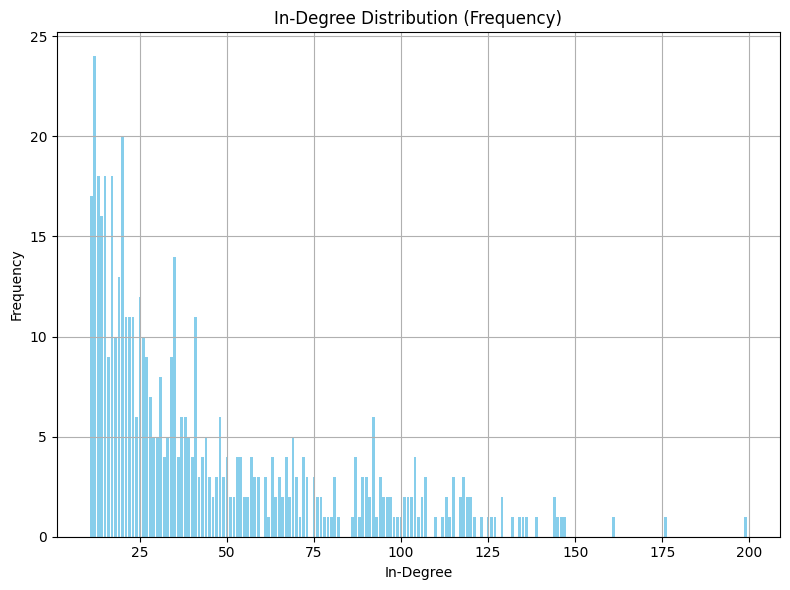

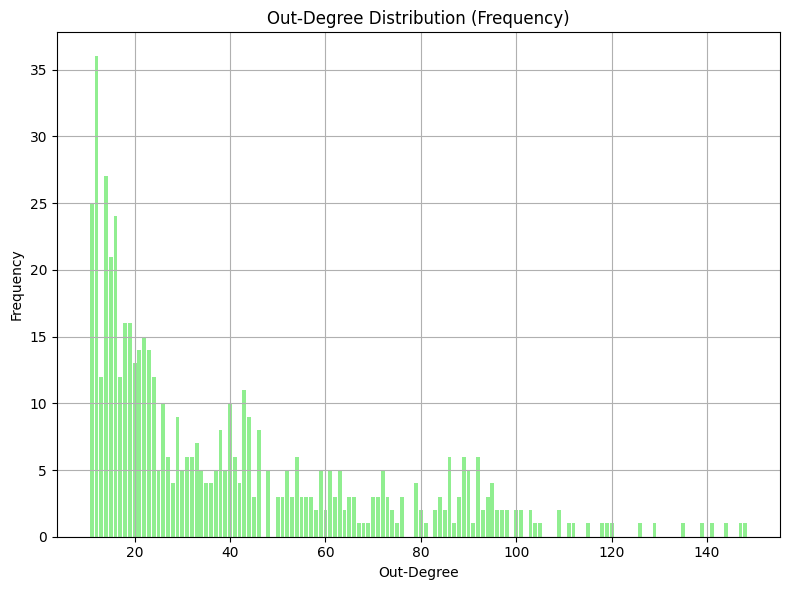

In [18]:
threshold = 10
in_deg,out_deg = greater_dict(in_degrees,threshold),greater_dict(out_degrees,threshold)
transfer_net.in_degree_dist(in_deg)
transfer_net.out_degree_dist(out_deg)

*  ** From these distributions, it can be deduced that some teams were very active in the transfer market while some teams did not sell and did not buy too many players.**

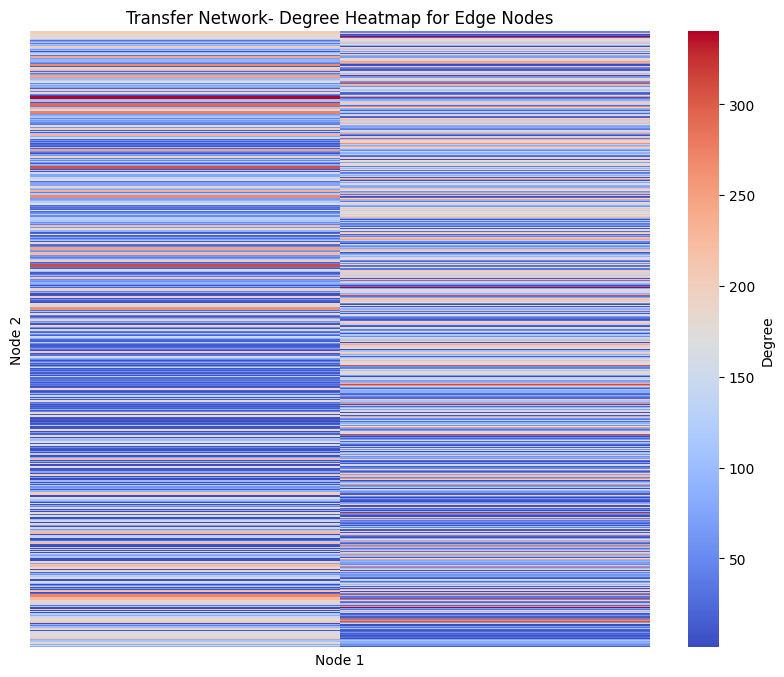

Assortativity coefficient: -0.29522520841727506
The network is disassortative


In [19]:
transfer_net.analyze_assortativeness()

*   **The network is disassortative. Meaning high spending clubs does not necessarly buy players from other high spending clubs. This suggests that players may transfer from low spending club to high spending club. Possibly from less successful club to more successful club, or vice-versa. **

In [20]:
node_strengths = transfer_net.node_strengths()
sort_dict(node_strengths)

{'Real Madrid': 7421680002.0,
 'Chelsea FC': 4721140040.0,
 'FC Barcelona': 4578036016.0,
 'Manchester City': 4294460026.0,
 'Juventus FC': 4177198020.0,
 'Chelsea': 4168860026.0,
 'Manchester United': 4119170014.0,
 'Bayern Munich': 3931160020.0,
 'Barcelona': 3907140014.0,
 'AS Roma': 3865501046.0,
 'Man Utd': 3795400006.0,
 'Juventus': 3795300008.0,
 'Man City': 3773880012.0,
 'Paris Saint-Germain': 3282020034.0,
 'AC Milan': 3128060042.0,
 'Paris SG': 3080840010.0,
 'Liverpool FC': 3025940032.0,
 'Inter': 2900421010.0,
 'Atlético de Madrid': 2807970022.0,
 'Tottenham Hotspur': 2757430022.0,
 'Arsenal FC': 2719360024.0,
 'Liverpool': 2655640012.0,
 'Aston Villa': 2483088028.0,
 'Atlético Madrid': 2442720006.0,
 'SSC Napoli': 2386451012.0,
 'Arsenal': 2239780010.0,
 'Sevilla FC': 2217920036.0,
 'Spurs': 2057500020.0,
 'Olympique Lyon': 1965600018.0,
 'FC Internazionale': 1954432020.0,
 'Borussia Dortmund': 1926030030.0,
 'Everton FC': 1903038032.0,
 'AS Monaco': 1874460052.0,
 'Valen



*   **The function below represents the algorithm to detect central nodes in the network by correlating node strength and betweenness centrality.**

*   **It is used to find active teams in the transfer market in each season.**



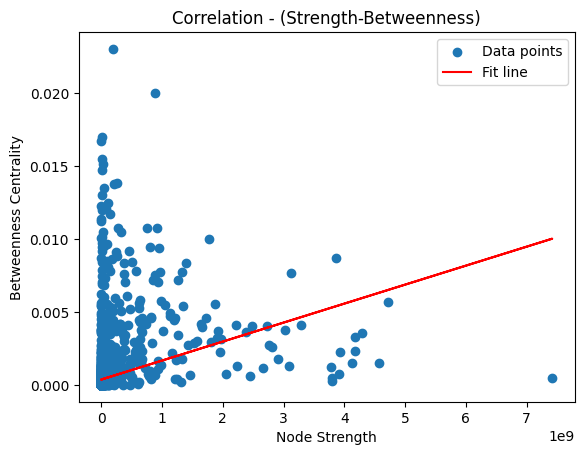

Correlation coefficient (r): 0.29


In [21]:
def strength_betweenness_corr(node_strengths,betweenness_centralities,title):
  corr = {key: (node_strengths[key], betweenness_centralities[key]) for key in node_strengths.keys()}

  values = corr.values()

  x = np.array([i[0] for i in values])
  y = np.array([i[1] for i in values])

  # linear regression
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

  # the fit line
  fit_line = slope * x + intercept

  # residuals
  residual_values = np.abs(y - fit_line)

  plt.scatter(x, y, label='Data points')

  plt.plot(x, fit_line, color='red', label='Fit line')

  plt.xlabel('Node Strength')
  plt.ylabel('Betweenness Centrality')
  plt.title(title)

  plt.legend()

  plt.show()

  print(f"Correlation coefficient (r): {r_value:.2f}")

  residual_dict = {}
  for i, key in enumerate(corr.keys()):
    residual_dict[key] = abs(residual_values[i])

  return corr, sort_dict(residual_dict,False)

corr,residuals = strength_betweenness_corr(node_strengths,betweenness_centralities,'Correlation - (Strength-Betweenness)')

*   **As shown above, there is a positive correlation between node strength and betweenness centrality. Node strength is calculated with the summation of in-degree of node and out-degree of node. The correlation may be even higher, but since there are some nodes which have not out degrees(because transfers from only 7 leagues analyzed). Therefore players transferred except this 7 leagues not analyzed. This results in some deviations and reduced the correlation coefficient. This data can be filtered and nodes existing in one of 7 leagues can be determined as heavy traders in the transfer market.**

### **Compare Highly Correlated central clubs with standings**

1995
****


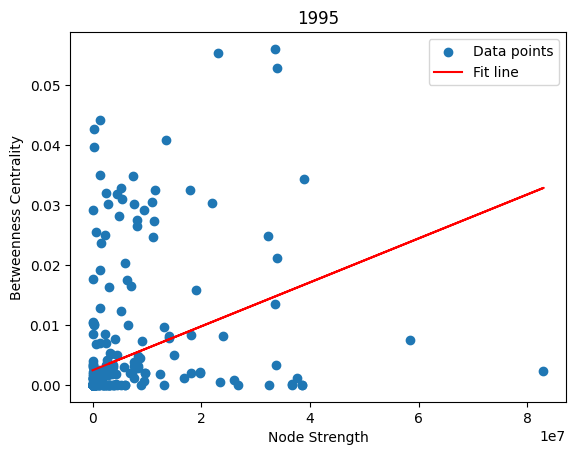

Correlation coefficient (r): 0.34
1996
****


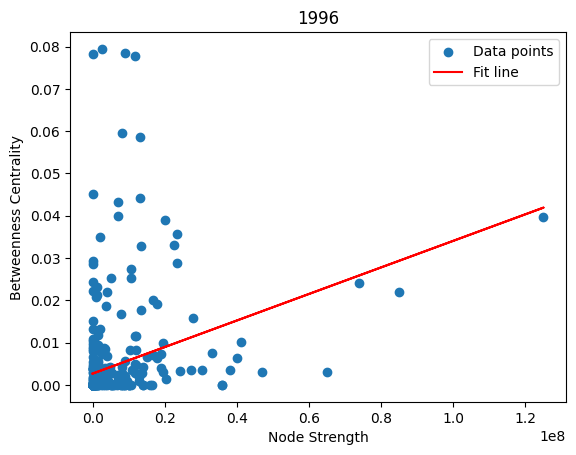

Correlation coefficient (r): 0.31
1997
****


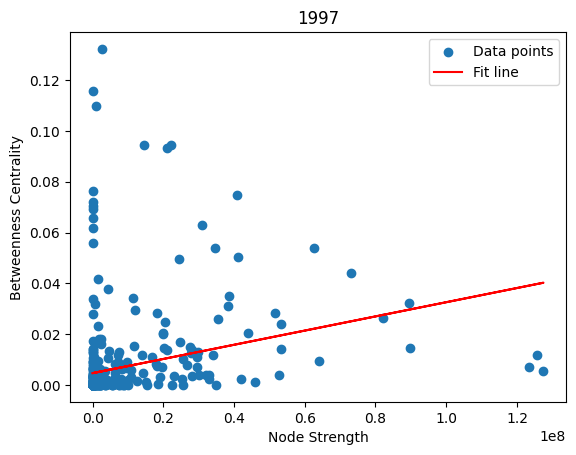

Correlation coefficient (r): 0.27
1998
****


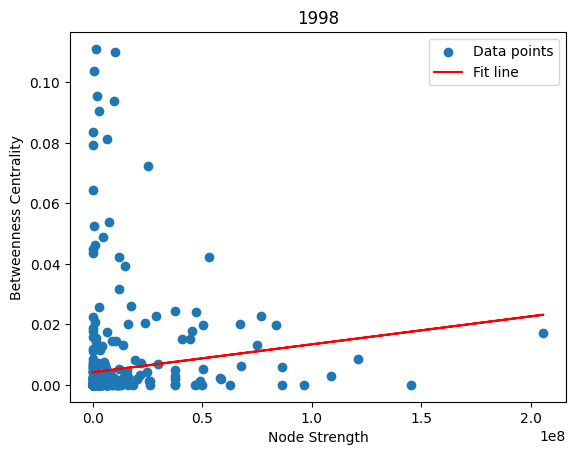

Correlation coefficient (r): 0.12
1999
****


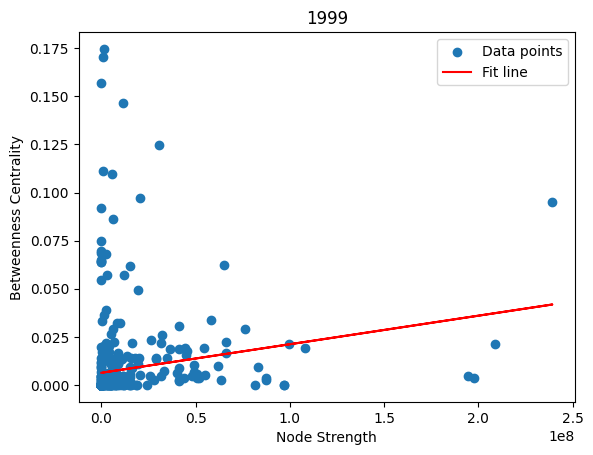

Correlation coefficient (r): 0.17
2000
****


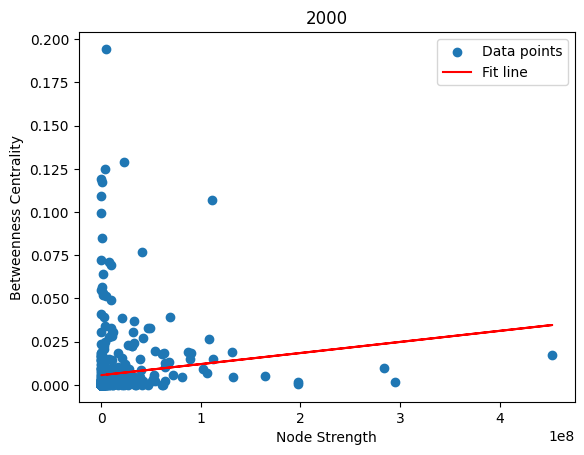

Correlation coefficient (r): 0.12
2001
****


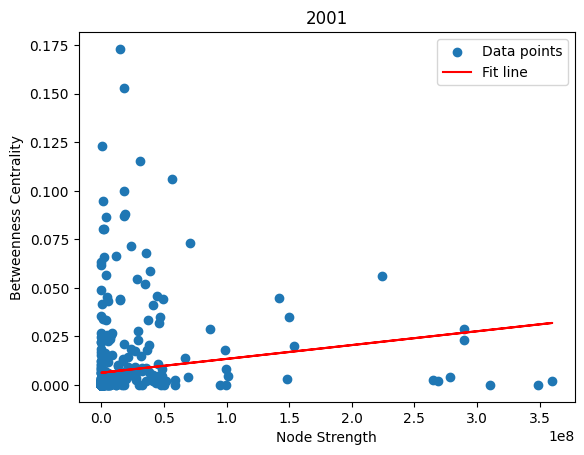

Correlation coefficient (r): 0.15
2002
****


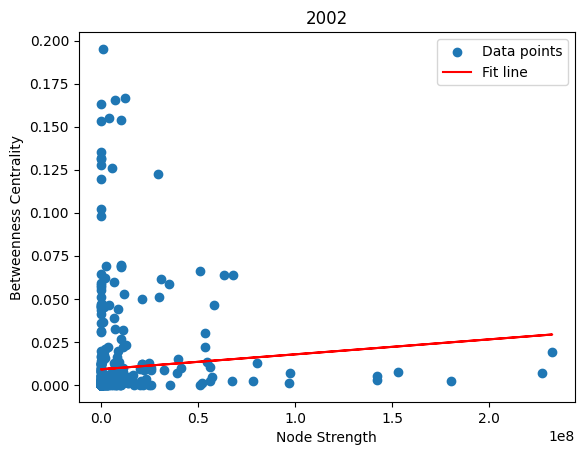

Correlation coefficient (r): 0.07
2003
****


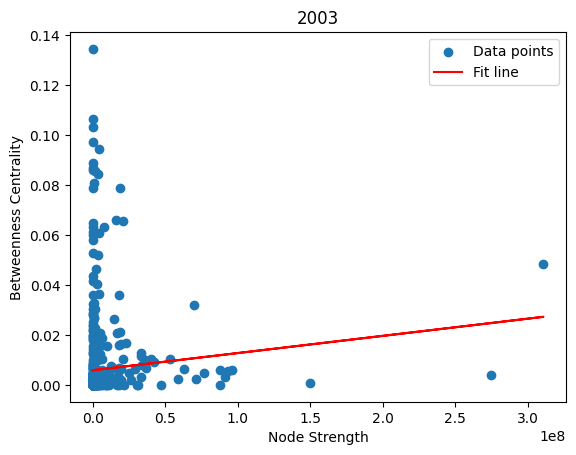

Correlation coefficient (r): 0.09
2004
****


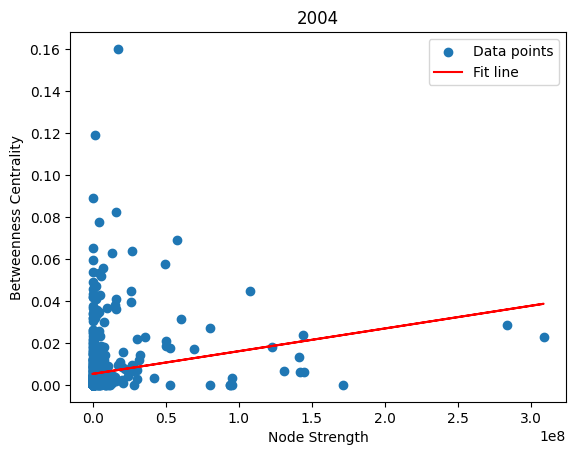

Correlation coefficient (r): 0.18
2005
****


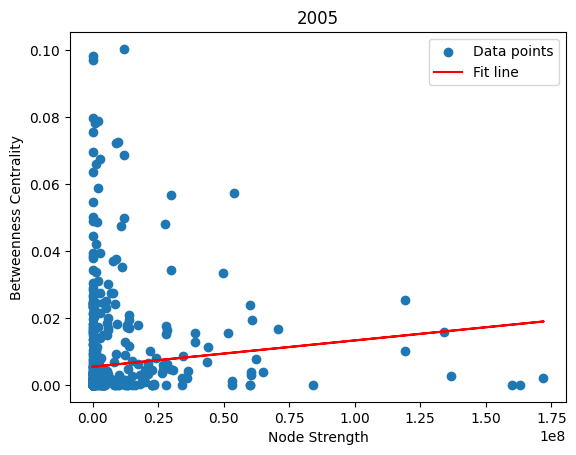

Correlation coefficient (r): 0.10
2006
****


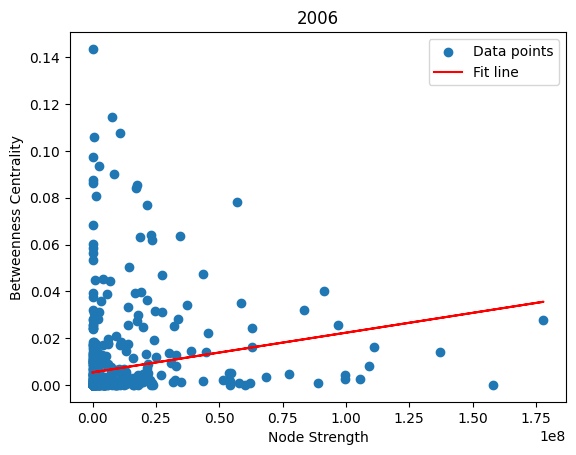

Correlation coefficient (r): 0.19
2007
****


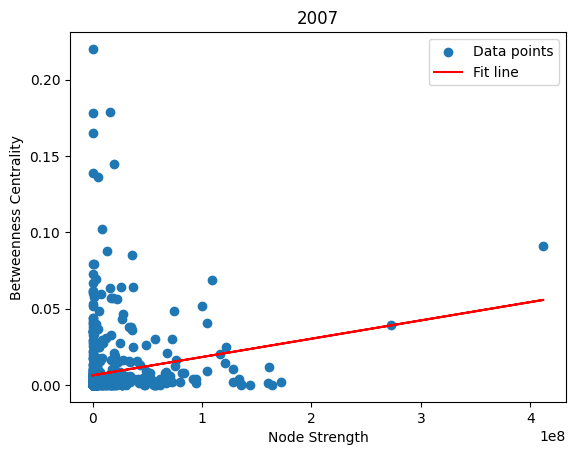

Correlation coefficient (r): 0.17
2008
****


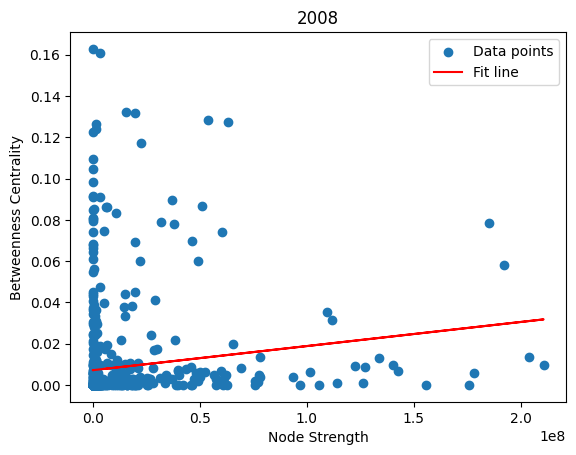

Correlation coefficient (r): 0.14
2009
****


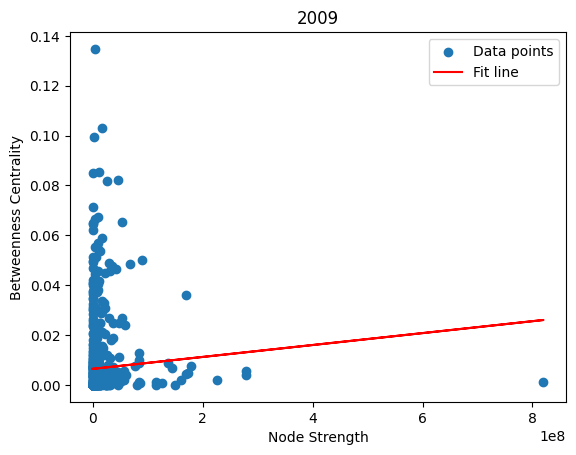

Correlation coefficient (r): 0.06
2010
****


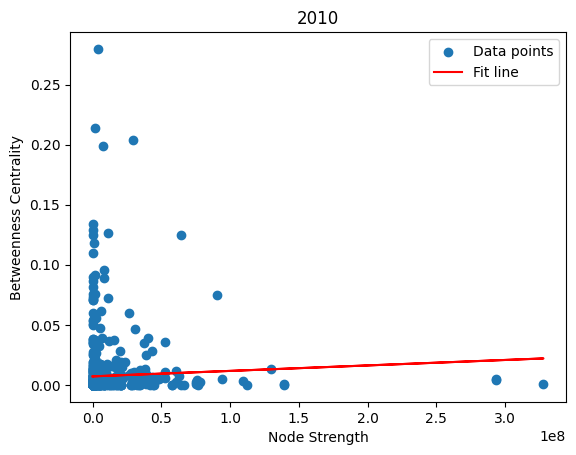

Correlation coefficient (r): 0.05
2011
****


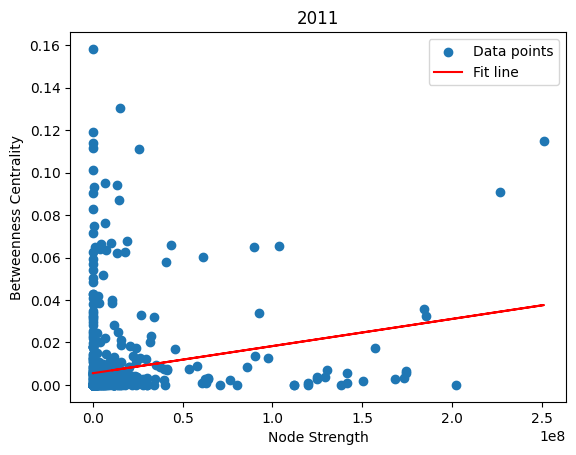

Correlation coefficient (r): 0.20
2012
****


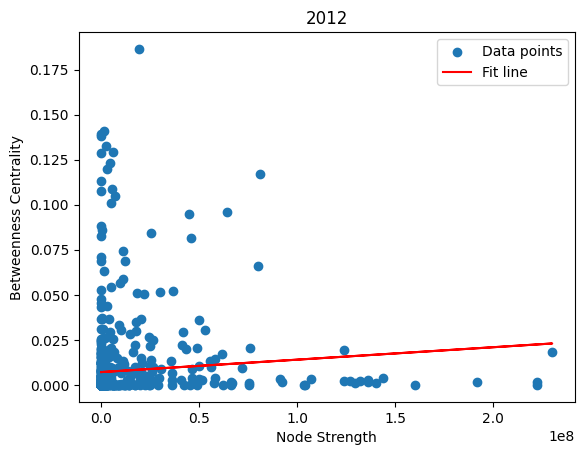

Correlation coefficient (r): 0.08
2013
****


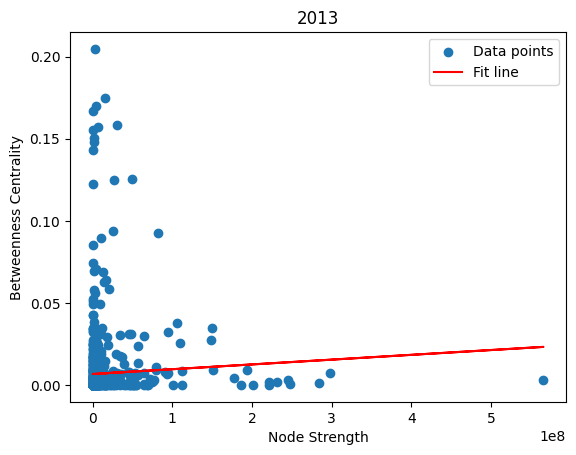

Correlation coefficient (r): 0.05
2014
****


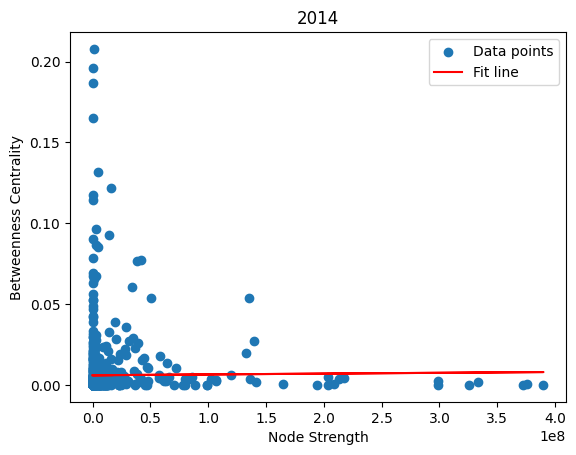

Correlation coefficient (r): 0.01
2015
****


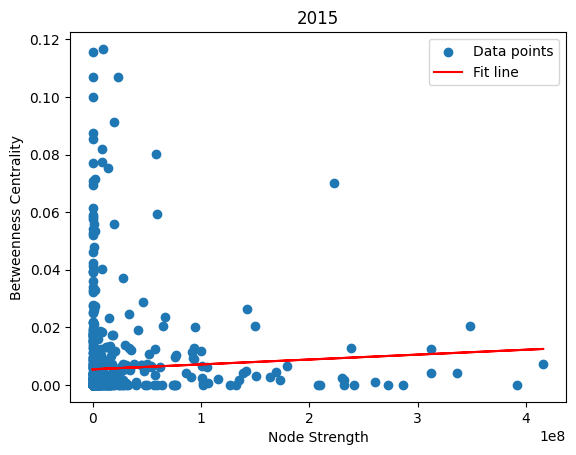

Correlation coefficient (r): 0.05
2016
****


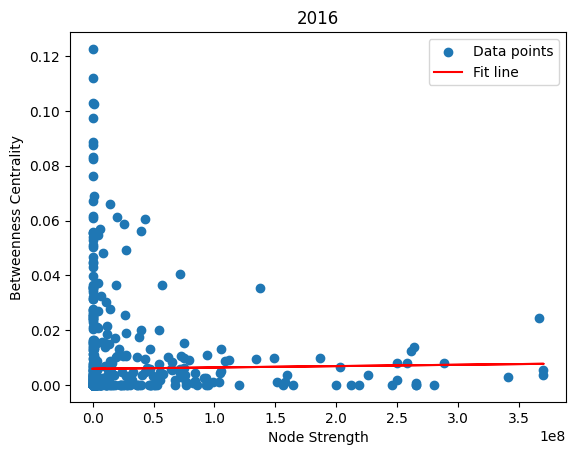

Correlation coefficient (r): 0.02
2017
****


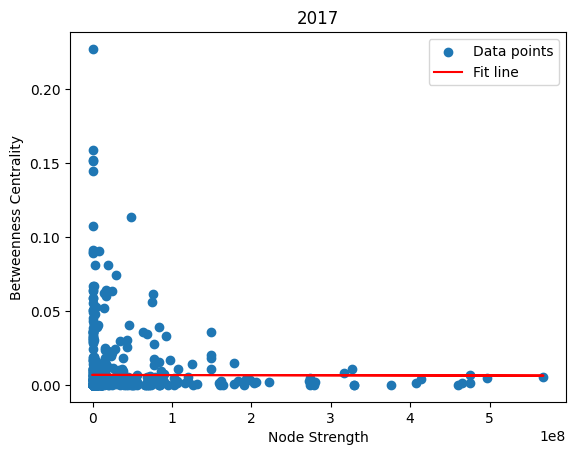

Correlation coefficient (r): -0.00
2018
****


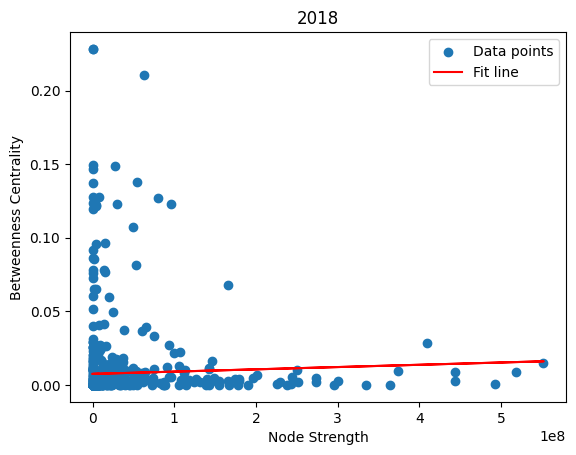

Correlation coefficient (r): 0.04
2019
****


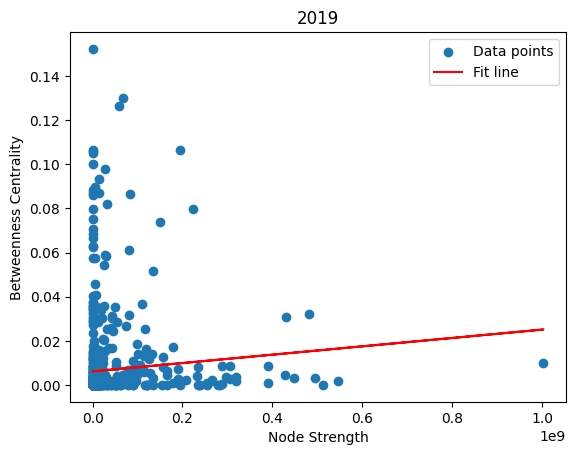

Correlation coefficient (r): 0.08
2020
****


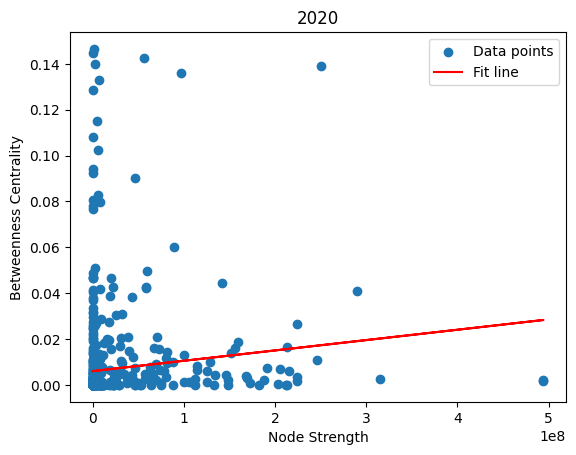

Correlation coefficient (r): 0.11
2021
****


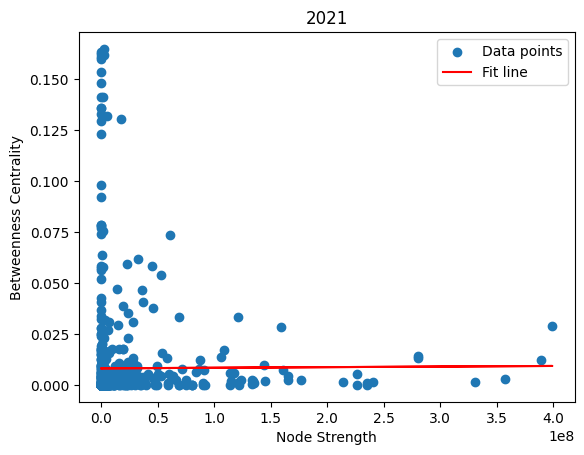

Correlation coefficient (r): 0.01


In [22]:
standings_df = pd.read_csv('standings.csv')
diff_data = {}
for season in range(1995,2022):
  season_data = {}
  curr_season = season
  next_season = season+1
  print(curr_season)
  print('****')
  # filter dataframe by season
  filter_df = df[df['year'] == curr_season]
  # construct network
  net = TransferNetwork(filter_df)
  # get node strengths
  strengths = net.node_strengths()
  # get betweenness centralities
  degree_centr,betweenness_centr= net.measure_centrality()
  # calculate correlation between node_strengths - betweenness_centralities
  corr_dict,residus = strength_betweenness_corr(strengths,betweenness_centr,curr_season)
  # filter standings by season and next season
  # calculate points difference and position difference between seasons
  correlated_teams = residus.keys()
  while True:
    count = 0
    for team in correlated_teams:
      team_exists,diffs = get_team_season_diff(standings_df,curr_season,team)
      if team_exists:
        (position_diff,points_diff) = diffs
        count += 1
        season_data[team] = (position_diff,points_diff)
      if count == 25:
        break
    break
  diff_data[curr_season] = season_data



Season - 1995
----------------------------------------
-> Teams that increase rankings and points:
Real Zaragoza:  rank: 1 | points: 2
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
RCD Espanyol Barcelona:  rank: 8 | points: -23
-> Clubs with lowest ranking difference:
FC Girondins Bordeaux:  rank: -12 | points: 21
-> Clubs with highest points difference:
FC Girondins Bordeaux:  rank: -12 | points: 21
-> Clubs with lowest points difference:
RCD Espanyol Barcelona:  rank: 8 | points: -23

-> Average position difference of 1996: -0.16
-> Average points difference of 1996: -1.44


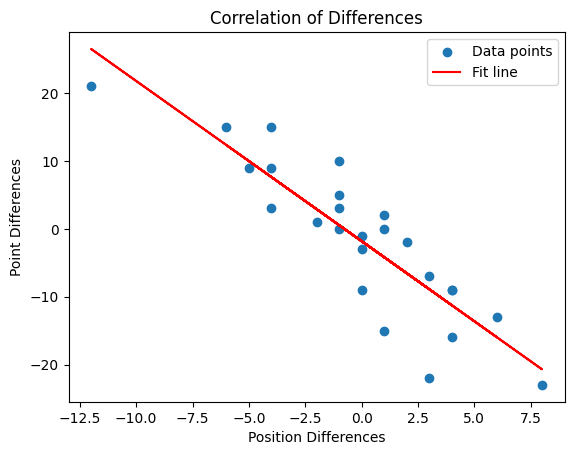

Correlation coefficient (r): -0.88
----------------------------------------
Season - 1996
----------------------------------------
-> Teams that increase rankings and points:
Leicester City:  rank: 1 | points: 6
-> Teams that decrease rankings and points:
MSV Duisburg:  rank: -1 | points: -1
Stade Rennais FC:  rank: -2 | points: -4
-> Clubs with highest ranking difference:
Sheffield Wednesday:  rank: 9 | points: -13
-> Clubs with lowest ranking difference:
Celta de Vigo:  rank: -10 | points: 11
-> Clubs with highest points difference:
Vitesse Arnhem:  rank: -2 | points: 15
-> Clubs with lowest points difference:
Real Madrid:  rank: 3 | points: -29

-> Average position difference of 1997: 1.04
-> Average points difference of 1997: -3.68


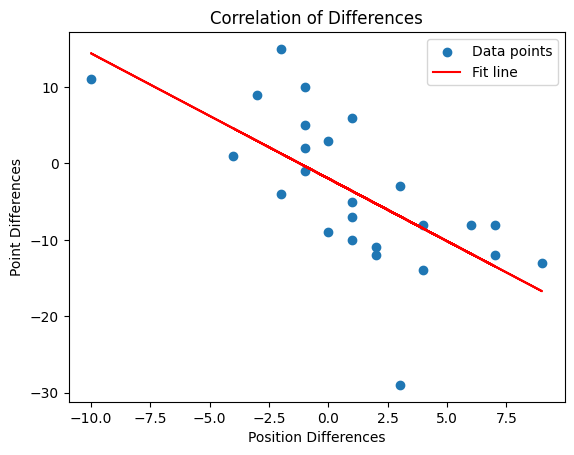

Correlation coefficient (r): -0.66
----------------------------------------
Season - 1997
----------------------------------------
-> Teams that increase rankings and points:
Piacenza FC:  rank: 1 | points: 4
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
FC Hansa Rostock:  rank: 8 | points: -13
FC Metz:  rank: 8 | points: -29
-> Clubs with lowest ranking difference:
VfL Wolfsburg:  rank: -8 | points: 16
-> Clubs with highest points difference:
Feyenoord Rotterdam:  rank: -3 | points: 19
-> Clubs with lowest points difference:
FC Metz:  rank: 8 | points: -29

-> Average position difference of 1998: 1.36
-> Average points difference of 1998: -2.64


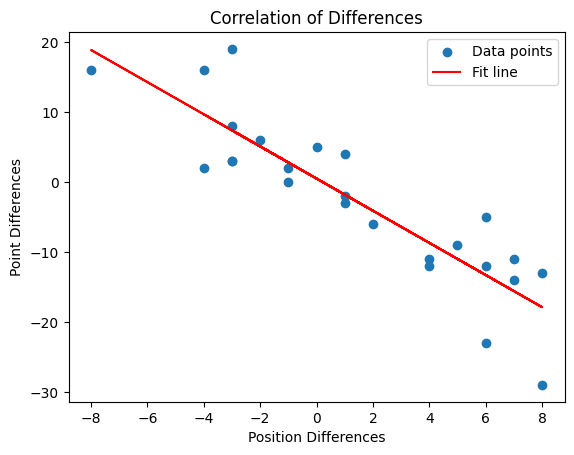

Correlation coefficient (r): -0.89
----------------------------------------
Season - 1998
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
Valencia CF:  rank: -1 | points: -1
-> Clubs with highest ranking difference:
Willem II Tilburg:  rank: 7 | points: -17
RCD Mallorca:  rank: 7 | points: -15
Sheffield Wednesday:  rank: 7 | points: -15
-> Clubs with lowest ranking difference:
Deportivo Alavés:  rank: -10 | points: 21
-> Clubs with highest points difference:
Deportivo Alavés:  rank: -10 | points: 21
-> Clubs with lowest points difference:
Willem II Tilburg:  rank: 7 | points: -17

-> Average position difference of 1999: 0.08
-> Average points difference of 1999: 0.52


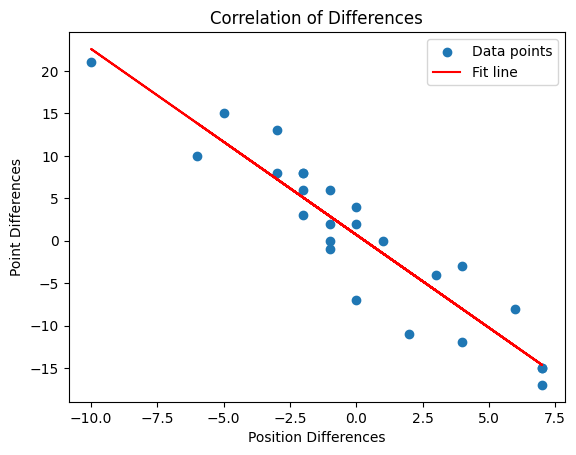

Correlation coefficient (r): -0.93
----------------------------------------
Season - 1999
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
AS Saint-Étienne:  rank: 10 | points: -11
-> Clubs with lowest ranking difference:
FC Nantes:  rank: -11 | points: 25
-> Clubs with highest points difference:
FC Nantes:  rank: -11 | points: 25
-> Clubs with lowest points difference:
SC Heerenveen:  rank: 8 | points: -21

-> Average position difference of 2000: 1.00
-> Average points difference of 2000: -0.92


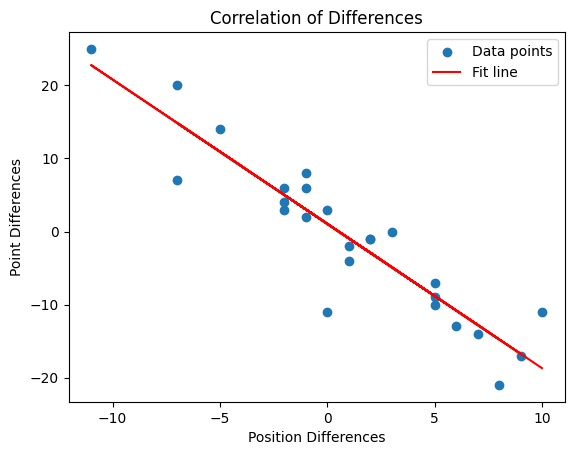

Correlation coefficient (r): -0.92
----------------------------------------
Season - 2000
----------------------------------------
-> Teams that increase rankings and points:
Bayern Munich:  rank: 2 | points: 5
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
Ipswich Town:  rank: 13 | points: -30
-> Clubs with lowest ranking difference:
RC Lens:  rank: -12 | points: 24
-> Clubs with highest points difference:
RC Lens:  rank: -12 | points: 24
-> Clubs with lowest points difference:
Ipswich Town:  rank: 13 | points: -30

-> Average position difference of 2001: -0.52
-> Average points difference of 2001: 1.48


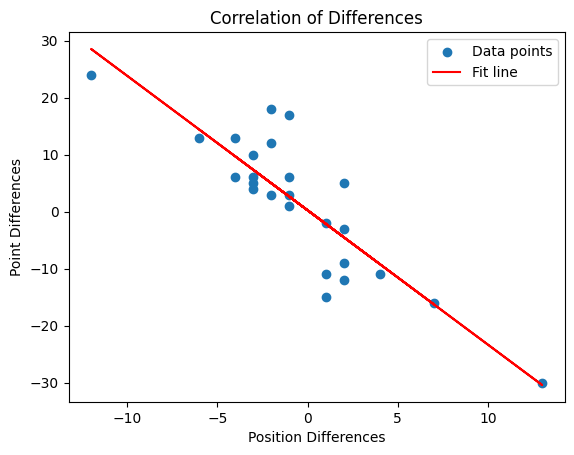

Correlation coefficient (r): -0.87
----------------------------------------
Season - 2001
----------------------------------------
-> Teams that increase rankings and points:
Varzim SC:  rank: 1 | points: 4
-> Teams that decrease rankings and points:
Inter:  rank: -1 | points: -4
-> Clubs with highest ranking difference:
LOSC Lille:  rank: 9 | points: -14
-> Clubs with lowest ranking difference:
Everton FC:  rank: -8 | points: 16
Udinese Calcio:  rank: -8 | points: 16
-> Clubs with highest points difference:
Everton FC:  rank: -8 | points: 16
Udinese Calcio:  rank: -8 | points: 16
-> Clubs with lowest points difference:
Boavista FC:  rank: 7 | points: -27

-> Average position difference of 2002: 1.20
-> Average points difference of 2002: -3.32


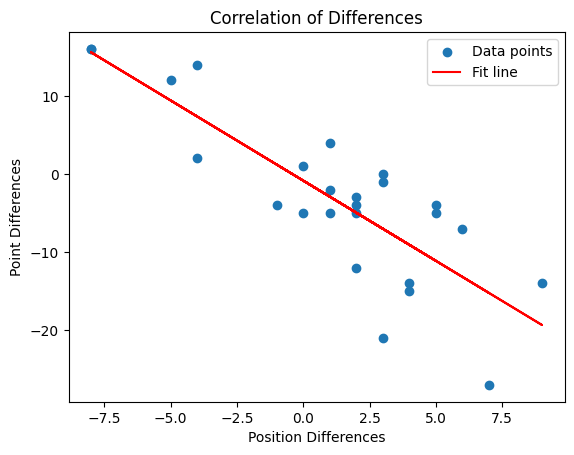

Correlation coefficient (r): -0.83
----------------------------------------
Season - 2002
----------------------------------------
-> Teams that increase rankings and points:
VfB Stuttgart:  rank: 2 | points: 5
-> Teams that decrease rankings and points:
Borussia Mönchengladbach:  rank: -1 | points: -3
-> Clubs with highest ranking difference:
Celta de Vigo:  rank: 15 | points: -22
-> Clubs with lowest ranking difference:
Paris Saint-Germain:  rank: -9 | points: 22
Bolton Wanderers:  rank: -9 | points: 9
-> Clubs with highest points difference:
AS Roma:  rank: -6 | points: 22
Paris Saint-Germain:  rank: -9 | points: 22
-> Clubs with lowest points difference:
EA Guingamp:  rank: 11 | points: -24

-> Average position difference of 2003: 0.36
-> Average points difference of 2003: 0.12


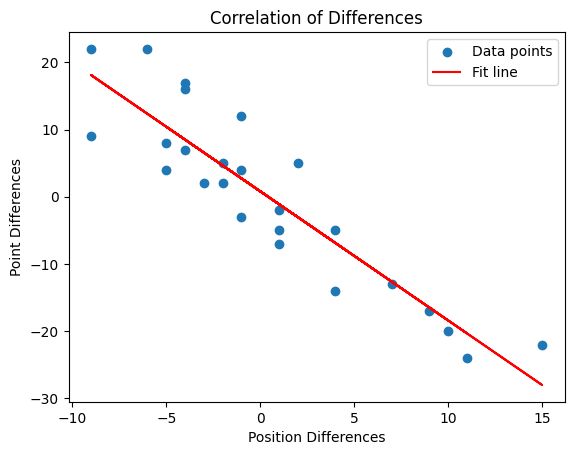

Correlation coefficient (r): -0.91
----------------------------------------
Season - 2003
----------------------------------------
-> Teams that increase rankings and points:
Bologna FC 1909:  rank: 5 | points: 3
Brescia Calcio:  rank: 8 | points: 1
-> Teams that decrease rankings and points:
Olympique Marseille:  rank: -2 | points: -2
-> Clubs with highest ranking difference:
Newcastle United:  rank: 9 | points: -12
-> Clubs with lowest ranking difference:
Tottenham Hotspur:  rank: -5 | points: 7
Stade Rennais FC:  rank: -5 | points: 3
-> Clubs with highest points difference:
Inter:  rank: -1 | points: 13
PSV Eindhoven:  rank: -1 | points: 13
-> Clubs with lowest points difference:
FC Porto:  rank: 1 | points: -20
SC Freiburg:  rank: 5 | points: -20

-> Average position difference of 2004: 1.84
-> Average points difference of 2004: -3.20


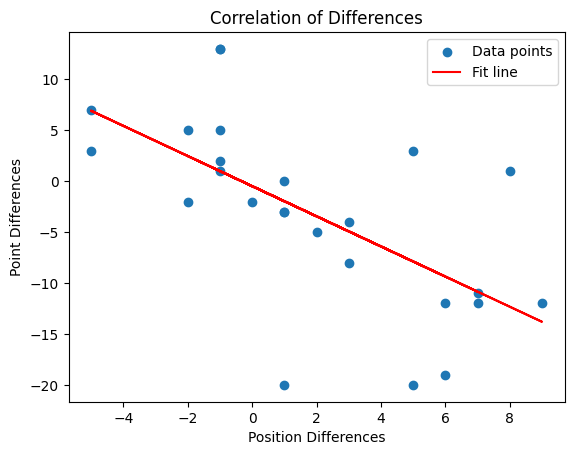

Correlation coefficient (r): -0.63
----------------------------------------
Season - 2004
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
Real Zaragoza:  rank: -1 | points: -4
-> Clubs with highest ranking difference:
Real Betis Balompié:  rank: 10 | points: -20
RCD Espanyol Barcelona:  rank: 10 | points: -20
FC Messina Peloro:  rank: 10 | points: -17
-> Clubs with lowest ranking difference:
Blackburn Rovers:  rank: -9 | points: 21
-> Clubs with highest points difference:
Blackburn Rovers:  rank: -9 | points: 21
-> Clubs with lowest points difference:
RBC Roosendaal:  rank: 2 | points: -23

-> Average position difference of 2005: 1.76
-> Average points difference of 2005: -3.28


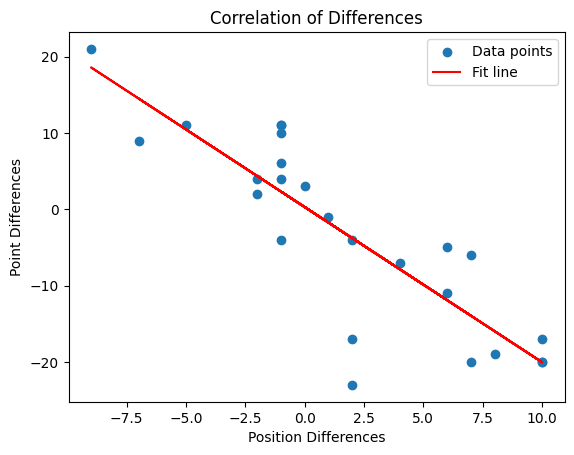

Correlation coefficient (r): -0.85
----------------------------------------
Season - 2005
----------------------------------------
-> Teams that increase rankings and points:
AC Milan:  rank: 1 | points: 3
Cagliari Calcio:  rank: 3 | points: 1
-> Teams that decrease rankings and points:
Académica Coimbra:  rank: -1 | points: -13
-> Clubs with highest ranking difference:
Wigan Athletic:  rank: 7 | points: -13
-> Clubs with lowest ranking difference:
FC Toulouse:  rank: -13 | points: 17
-> Clubs with highest points difference:
FC Toulouse:  rank: -13 | points: 17
-> Clubs with lowest points difference:
Hamburger SV:  rank: 4 | points: -23

-> Average position difference of 2006: 0.36
-> Average points difference of 2006: -1.84


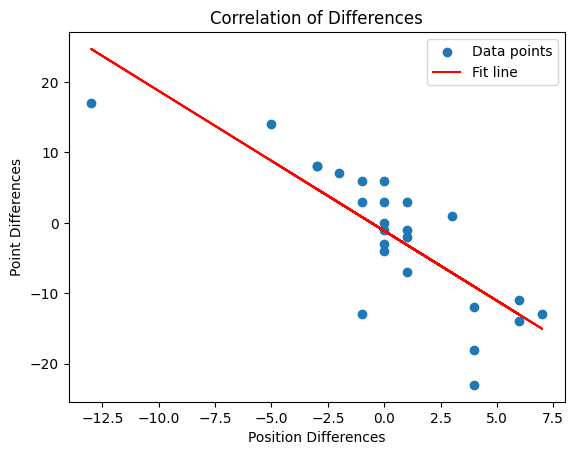

Correlation coefficient (r): -0.81
----------------------------------------
Season - 2006
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
Reading FC:  rank: 10 | points: -19
-> Clubs with lowest ranking difference:
AS Nancy-Lorraine:  rank: -9 | points: 11
-> Clubs with highest points difference:
Arsenal FC:  rank: -1 | points: 15
-> Clubs with lowest points difference:
AZ Alkmaar:  rank: 8 | points: -29

-> Average position difference of 2007: 2.00
-> Average points difference of 2007: -3.40


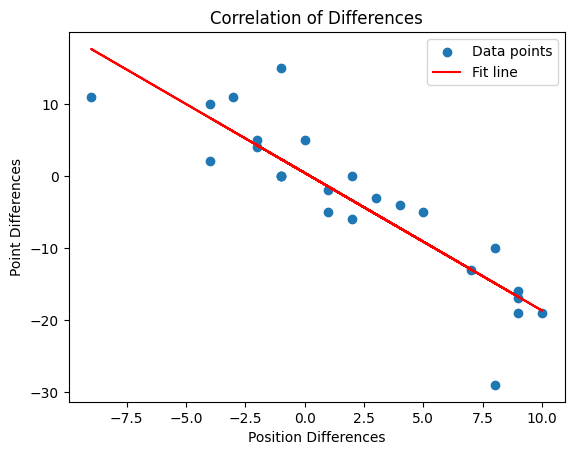

Correlation coefficient (r): -0.89
----------------------------------------
Season - 2007
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
Valenciennes FC:  rank: -1 | points: -1
-> Clubs with highest ranking difference:
Belenenses:  rank: 8 | points: -19
-> Clubs with lowest ranking difference:
FC Toulouse:  rank: -13 | points: 22
-> Clubs with highest points difference:
AZ Alkmaar:  rank: -10 | points: 37
-> Clubs with lowest points difference:
Belenenses:  rank: 8 | points: -19

-> Average position difference of 2008: -1.20
-> Average points difference of 2008: 2.92


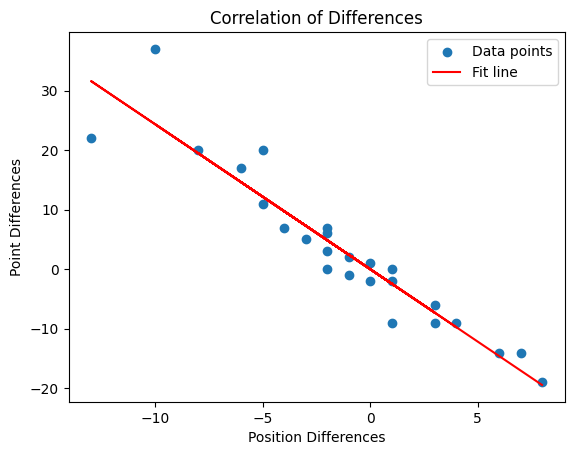

Correlation coefficient (r): -0.94
----------------------------------------
Season - 2008
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
Hertha BSC:  rank: 14 | points: -39
-> Clubs with lowest ranking difference:
Roda JC Kerkrade:  rank: -7 | points: 17
-> Clubs with highest points difference:
Roda JC Kerkrade:  rank: -7 | points: 17
-> Clubs with lowest points difference:
Hertha BSC:  rank: 14 | points: -39

-> Average position difference of 2009: 0.92
-> Average points difference of 2009: -3.48


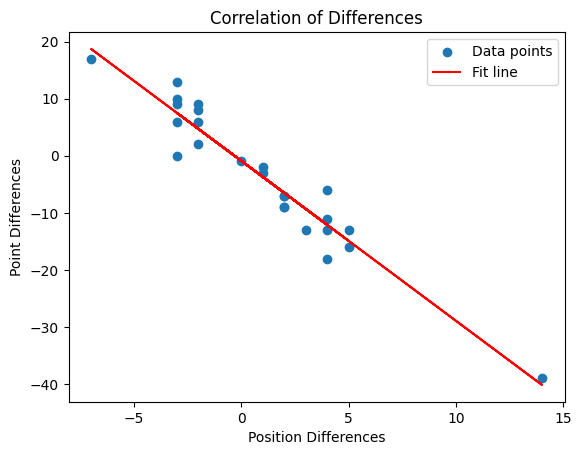

Correlation coefficient (r): -0.96
----------------------------------------
Season - 2009
----------------------------------------
-> Teams that increase rankings and points:
Vitesse Arnhem:  rank: 1 | points: 3
Wolverhampton Wanderers:  rank: 2 | points: 2
-> Teams that decrease rankings and points:
AZ Alkmaar:  rank: -1 | points: -3
-> Clubs with highest ranking difference:
UC Sampdoria:  rank: 14 | points: -31
-> Clubs with lowest ranking difference:
1.FC Nuremberg:  rank: -10 | points: 16
-> Clubs with highest points difference:
1.FC Nuremberg:  rank: -10 | points: 16
-> Clubs with lowest points difference:
UC Sampdoria:  rank: 14 | points: -31

-> Average position difference of 2010: 1.72
-> Average points difference of 2010: -1.92


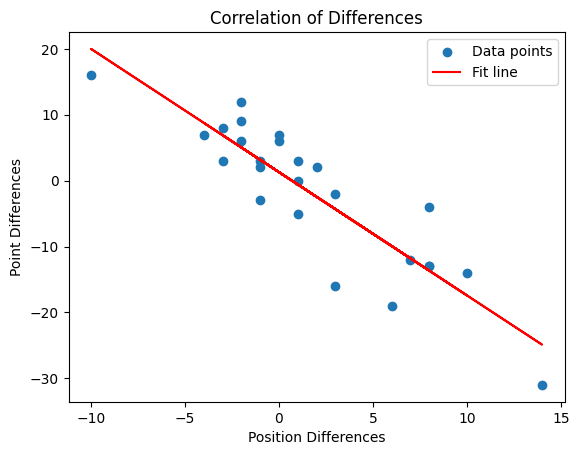

Correlation coefficient (r): -0.89
----------------------------------------
Season - 2010
----------------------------------------
-> Teams that increase rankings and points:
CD Nacional:  rank: 1 | points: 2
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
Hamburger SV:  rank: 7 | points: -9
-> Clubs with lowest ranking difference:
Levante UD:  rank: -8 | points: 10
-> Clubs with highest points difference:
Marítimo:  rank: -4 | points: 15
-> Clubs with lowest points difference:
Wolverhampton Wanderers:  rank: 3 | points: -15

-> Average position difference of 2011: 0.84
-> Average points difference of 2011: -2.40


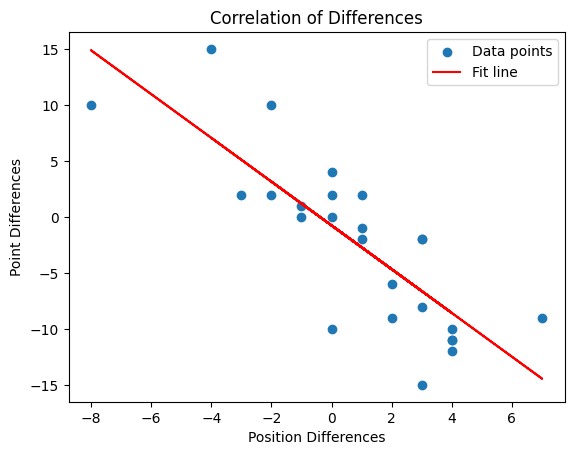

Correlation coefficient (r): -0.81
----------------------------------------
Season - 2011
----------------------------------------
-> Teams that increase rankings and points:
Tottenham Hotspur:  rank: 1 | points: 3
-> Teams that decrease rankings and points:
RCD Espanyol Barcelona:  rank: -1 | points: -2
-> Clubs with highest ranking difference:
AS Nancy-Lorraine:  rank: 7 | points: -7
Stade Rennais FC:  rank: 7 | points: -14
FC Évian Thonon Gaillard:  rank: 7 | points: -10
-> Clubs with lowest ranking difference:
ACF Fiorentina:  rank: -9 | points: 24
-> Clubs with highest points difference:
ACF Fiorentina:  rank: -9 | points: 24
-> Clubs with lowest points difference:
Stade Rennais FC:  rank: 7 | points: -14

-> Average position difference of 2012: 0.92
-> Average points difference of 2012: -1.48


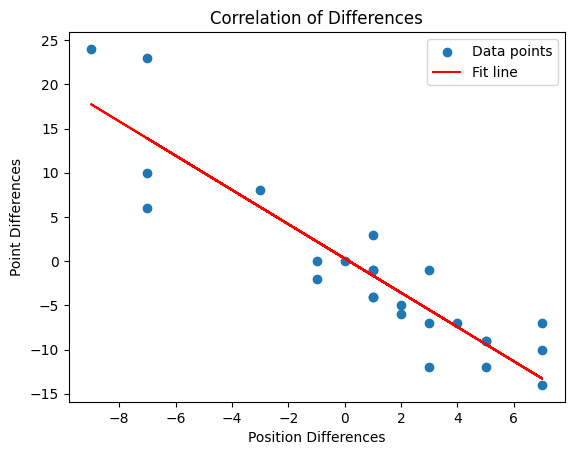

Correlation coefficient (r): -0.91
----------------------------------------
Season - 2012
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
Sunderland AFC:  rank: -3 | points: -1
-> Clubs with highest ranking difference:
SC Freiburg:  rank: 9 | points: -15
-> Clubs with lowest ranking difference:
1.FSV Mainz 05:  rank: -6 | points: 11
Newcastle United:  rank: -6 | points: 8
-> Clubs with highest points difference:
1.FSV Mainz 05:  rank: -6 | points: 11
-> Clubs with lowest points difference:
Udinese Calcio:  rank: 8 | points: -22

-> Average position difference of 2013: 0.92
-> Average points difference of 2013: -2.32


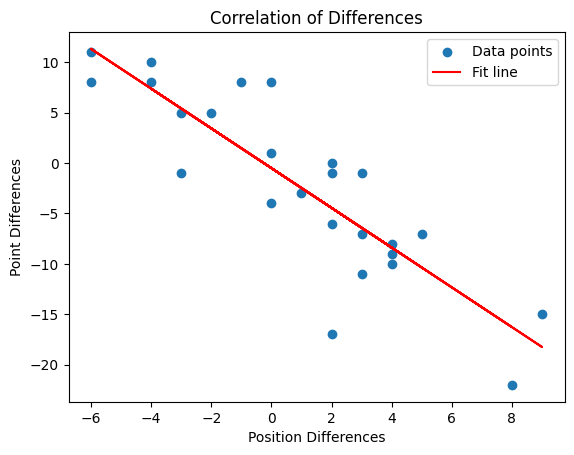

Correlation coefficient (r): -0.86
----------------------------------------
Season - 2013
----------------------------------------
-> Teams that increase rankings and points:
CD Nacional:  rank: 2 | points: 2
-> Teams that decrease rankings and points:
FC Augsburg:  rank: -3 | points: -3
-> Clubs with highest ranking difference:
FC Lorient:  rank: 8 | points: -6
FC Toulouse:  rank: 8 | points: -7
-> Clubs with lowest ranking difference:
Genoa CFC:  rank: -8 | points: 15
-> Clubs with highest points difference:
PSV Eindhoven:  rank: -3 | points: 29
-> Clubs with lowest points difference:
Liverpool FC:  rank: 4 | points: -22

-> Average position difference of 2014: 0.60
-> Average points difference of 2014: 0.52


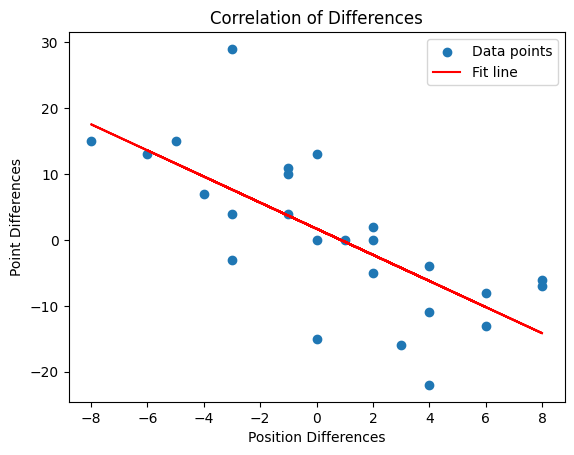

Correlation coefficient (r): -0.71
----------------------------------------
Season - 2014
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
Bayer 04 Leverkusen:  rank: -1 | points: -1
Málaga CF:  rank: -1 | points: -2
Arsenal FC:  rank: -1 | points: -4
-> Clubs with highest ranking difference:
TSG 1899 Hoffenheim:  rank: 7 | points: -7
FC Augsburg:  rank: 7 | points: -11
-> Clubs with lowest ranking difference:
Hertha BSC:  rank: -8 | points: 15
-> Clubs with highest points difference:
West Ham United:  rank: -5 | points: 15
Hertha BSC:  rank: -8 | points: 15
-> Clubs with lowest points difference:
SS Lazio:  rank: 5 | points: -15

-> Average position difference of 2015: 0.80
-> Average points difference of 2015: -0.64


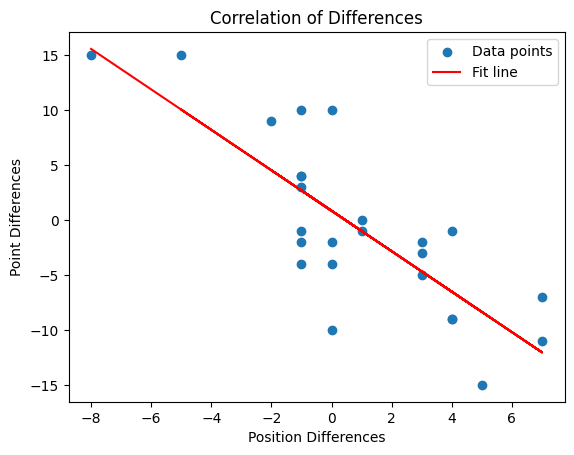

Correlation coefficient (r): -0.80
----------------------------------------
Season - 2015
----------------------------------------
-> Teams that increase rankings and points:
Olympique Lyon:  rank: 2 | points: 2
Manchester United:  rank: 1 | points: 3
-> Teams that decrease rankings and points:
Crystal Palace:  rank: -1 | points: -1
-> Clubs with highest ranking difference:
SC Bastia:  rank: 10 | points: -16
-> Clubs with lowest ranking difference:
Atalanta BC:  rank: -9 | points: 27
-> Clubs with highest points difference:
Atalanta BC:  rank: -9 | points: 27
-> Clubs with lowest points difference:
SC Bastia:  rank: 10 | points: -16

-> Average position difference of 2016: 0.16
-> Average points difference of 2016: 1.00


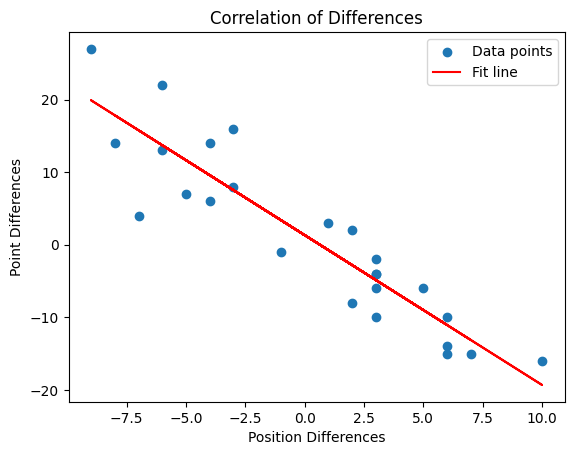

Correlation coefficient (r): -0.91
----------------------------------------
Season - 2016
----------------------------------------
-> Teams that increase rankings and points:
FC Nantes:  rank: 2 | points: 1
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
Stoke City:  rank: 6 | points: -11
-> Clubs with lowest ranking difference:
Manchester United:  rank: -4 | points: 12
-> Clubs with highest points difference:
SC Braga:  rank: -1 | points: 21
-> Clubs with lowest points difference:
Vitória Guimarães SC:  rank: 5 | points: -19

-> Average position difference of 2017: 0.60
-> Average points difference of 2017: -1.76


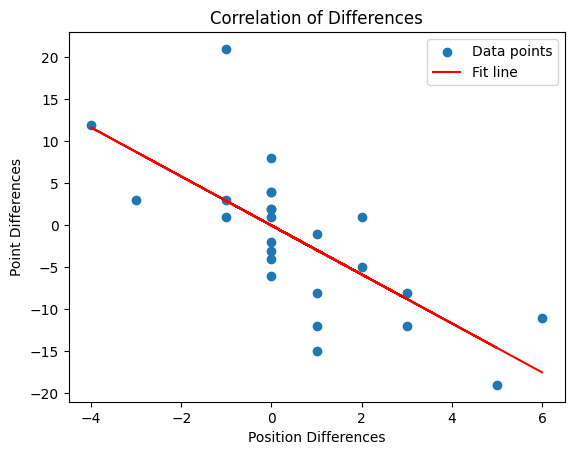

Correlation coefficient (r): -0.71
----------------------------------------
Season - 2017
----------------------------------------
-> Teams that increase rankings and points:
Newcastle United:  rank: 3 | points: 1
Portimonense SC:  rank: 1 | points: 1
-> Teams that decrease rankings and points:
UC Sampdoria:  rank: -1 | points: -1
-> Clubs with highest ranking difference:
Burnley FC:  rank: 8 | points: -14
-> Clubs with lowest ranking difference:
Moreirense FC:  rank: -8 | points: 20
-> Clubs with highest points difference:
Borussia Dortmund:  rank: -2 | points: 21
-> Clubs with lowest points difference:
Chievo Verona:  rank: 7 | points: -23

-> Average position difference of 2018: 0.72
-> Average points difference of 2018: -0.92


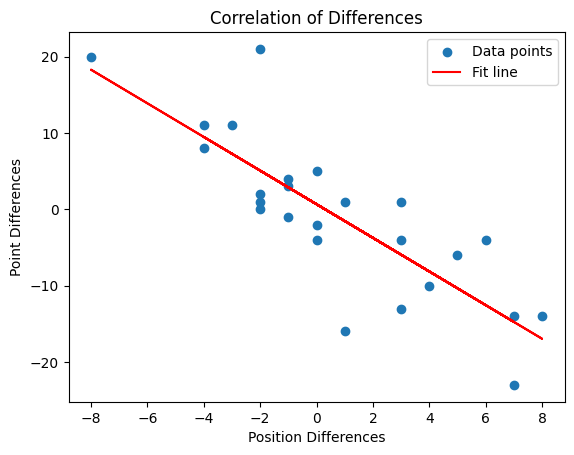

Correlation coefficient (r): -0.82
----------------------------------------
Season - 2018
----------------------------------------
-> Teams that increase rankings and points:
Bayer 04 Leverkusen:  rank: 1 | points: 5
Bologna FC 1909:  rank: 2 | points: 3
Udinese Calcio:  rank: 1 | points: 2
-> Teams that decrease rankings and points:
Angers SCO:  rank: -2 | points: -7
Stade Reims:  rank: -3 | points: -14
FC Girondins Bordeaux:  rank: -2 | points: -4
SC Heerenveen:  rank: -1 | points: -8
-> Clubs with highest ranking difference:
Real Betis Balompié:  rank: 5 | points: -9
SSC Napoli:  rank: 5 | points: -17
-> Clubs with lowest ranking difference:
ACF Fiorentina:  rank: -6 | points: 8
-> Clubs with highest points difference:
Atalanta BC:  rank: 0 | points: 9
-> Clubs with lowest points difference:
PSV Eindhoven:  rank: 2 | points: -34

-> Average position difference of 2019: 0.44
-> Average points difference of 2019: -6.96


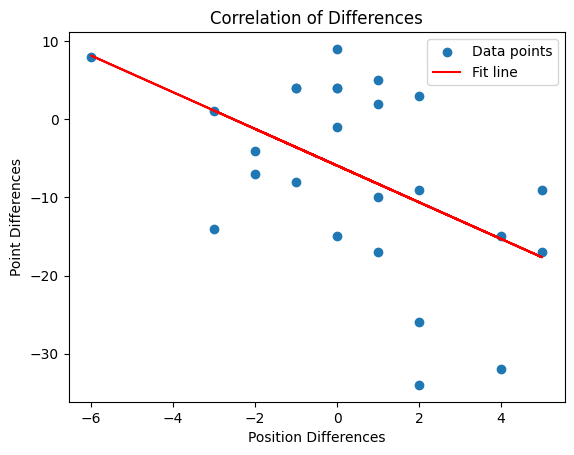

Correlation coefficient (r): -0.50
----------------------------------------
Season - 2019
----------------------------------------
-> Teams that increase rankings and points:
Heracles Almelo:  rank: 1 | points: 8
ADO Den Haag:  rank: 1 | points: 3
Nîmes Olympique:  rank: 1 | points: 8
OGC Nice:  rank: 3 | points: 11
Stade Brestois 29:  rank: 3 | points: 7
-> Teams that decrease rankings and points:
-> Clubs with highest ranking difference:
Sheffield United:  rank: 11 | points: -31
-> Clubs with lowest ranking difference:
Fortuna Sittard:  rank: -5 | points: 15
FC Metz:  rank: -5 | points: 13
-> Clubs with highest points difference:
Sporting CP:  rank: -3 | points: 25
-> Clubs with lowest points difference:
Sheffield United:  rank: 11 | points: -31

-> Average position difference of 2020: 0.92
-> Average points difference of 2020: 1.68


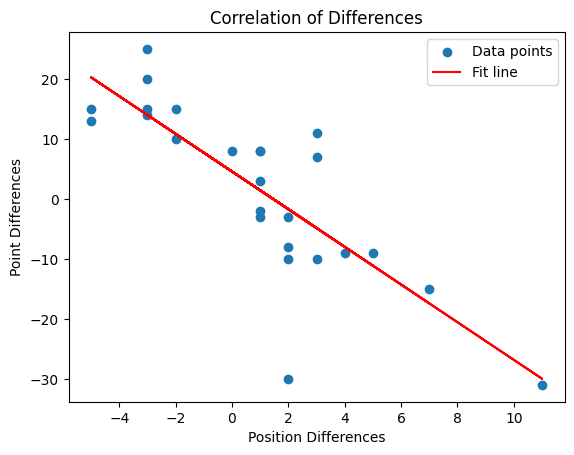

Correlation coefficient (r): -0.81
----------------------------------------
Season - 2020
----------------------------------------
-> Teams that increase rankings and points:
-> Teams that decrease rankings and points:
SS Lazio:  rank: -1 | points: -4
-> Clubs with highest ranking difference:
LOSC Lille:  rank: 9 | points: -28
-> Clubs with lowest ranking difference:
1. FC Köln:  rank: -9 | points: 19
-> Clubs with highest points difference:
ACF Fiorentina:  rank: -6 | points: 22
-> Clubs with lowest points difference:
LOSC Lille:  rank: 9 | points: -28

-> Average position difference of 2021: 0.52
-> Average points difference of 2021: -2.28


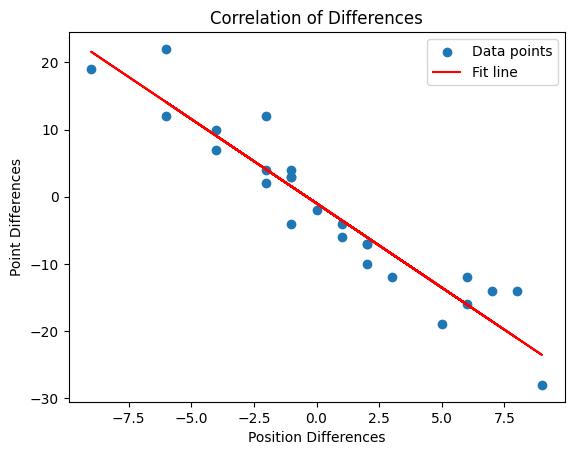

Correlation coefficient (r): -0.95
----------------------------------------
Season - 2021
----------------------------------------
-> Teams that increase rankings and points:
Olympique Marseille:  rank: 1 | points: 2
-> Teams that decrease rankings and points:
Crystal Palace:  rank: -1 | points: -3
-> Clubs with highest ranking difference:
Marítimo:  rank: 6 | points: -12
-> Clubs with lowest ranking difference:
Sparta Rotterdam:  rank: -8 | points: 24
-> Clubs with highest points difference:
Sparta Rotterdam:  rank: -8 | points: 24
-> Clubs with lowest points difference:
Southampton FC:  rank: 5 | points: -15

-> Average position difference of 2022: -0.48
-> Average points difference of 2022: 3.28


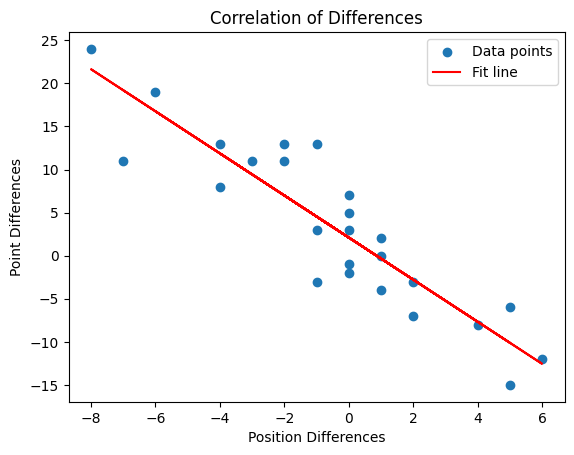

Correlation coefficient (r): -0.90
----------------------------------------
{1995: (-0.16, -1.44), 1996: (1.04, -3.68), 1997: (1.36, -2.64), 1998: (0.08, 0.52), 1999: (1.0, -0.92), 2000: (-0.52, 1.48), 2001: (1.2, -3.32), 2002: (0.36, 0.12), 2003: (1.84, -3.2), 2004: (1.76, -3.28), 2005: (0.36, -1.84), 2006: (2.0, -3.4), 2007: (-1.2, 2.92), 2008: (0.92, -3.48), 2009: (1.72, -1.92), 2010: (0.84, -2.4), 2011: (0.92, -1.48), 2012: (0.92, -2.32), 2013: (0.6, 0.52), 2014: (0.8, -0.64), 2015: (0.16, 1.0), 2016: (0.6, -1.76), 2017: (0.72, -0.92), 2018: (0.44, -6.96), 2019: (0.92, 1.68), 2020: (0.52, -2.28), 2021: (-0.48, 3.28)}


In [23]:
seasonal_differences_data = {}
for season, team_info in diff_data.items():
  print("Season - {}".format(season))
  print('-'*40)

  position_diffs = [i[0] for i in team_info.values()]
  point_diffs = [i[1] for i in team_info.values()]

  max_pos_diff,min_pos_diff = max(position_diffs),min(position_diffs)
  max_point_diff,min_point_diff = max(point_diffs),min(point_diffs)

  positive_diffs,negative_diffs = {},{}
  max_pos_clubs,min_pos_clubs = {},{}
  max_point_clubs,min_point_clubs = {},{}
  #position_diff,points_diff
  for team, diffs in team_info.items():
    (position_diff,points_diff) = diffs

    if position_diff > 0 and points_diff > 0:
      positive_diffs[team] = diffs
    elif position_diff < 0 and points_diff < 0:
      negative_diffs[team] = diffs

    if position_diff == max_pos_diff:
      max_pos_clubs[team] = diffs
    elif position_diff == min_pos_diff:
      min_pos_clubs[team] = diffs

    if points_diff == max_point_diff:
      max_point_clubs[team] = diffs
    elif points_diff == min_point_diff:
      min_point_clubs[team] = diffs

  print('-> Teams that increase rankings and points:')
  for team,diffs in positive_diffs.items():
    print('{}:  rank: {} | points: {}'.format(team,diffs[0],diffs[1]))

  print('-> Teams that decrease rankings and points:')
  for team,diffs in negative_diffs.items():
    print('{}:  rank: {} | points: {}'.format(team,diffs[0],diffs[1]))

  print('-> Clubs with highest ranking difference:')
  for team,diffs in max_pos_clubs.items():
    print('{}:  rank: {} | points: {}'.format(team,diffs[0],diffs[1]))

  print('-> Clubs with lowest ranking difference:')
  for team,diffs in min_pos_clubs.items():
    print('{}:  rank: {} | points: {}'.format(team,diffs[0],diffs[1]))

  print('-> Clubs with highest points difference:')
  for team,diffs in max_point_clubs.items():
    print('{}:  rank: {} | points: {}'.format(team,diffs[0],diffs[1]))

  print('-> Clubs with lowest points difference:')
  for team,diffs in min_point_clubs.items():
    print('{}:  rank: {} | points: {}'.format(team,diffs[0],diffs[1]))

  average_pos_diff = sum(position_diffs) / len(position_diffs)
  average_point_diff = sum(point_diffs) / len(point_diffs)

  seasonal_differences_data[season] = (average_pos_diff,average_point_diff)

  print("\n-> Average position difference of {}: {:.2f}".format(season+1, average_pos_diff))
  print("-> Average points difference of {}: {:.2f}".format(season+1, average_point_diff))

  x = np.array(position_diffs)
  y = np.array(point_diffs)
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  fit_line = slope * x + intercept
  plt.scatter(x, y, label='Data points')
  plt.plot(x, fit_line, color='red', label='Fit line')
  plt.xlabel('Position Differences')
  plt.ylabel('Point Differences')
  plt.title('Correlation of Differences')
  plt.legend()
  plt.show()

  print(f"Correlation coefficient (r): {r_value:.2f}")

  print('-'*40)

print(seasonal_differences_data)

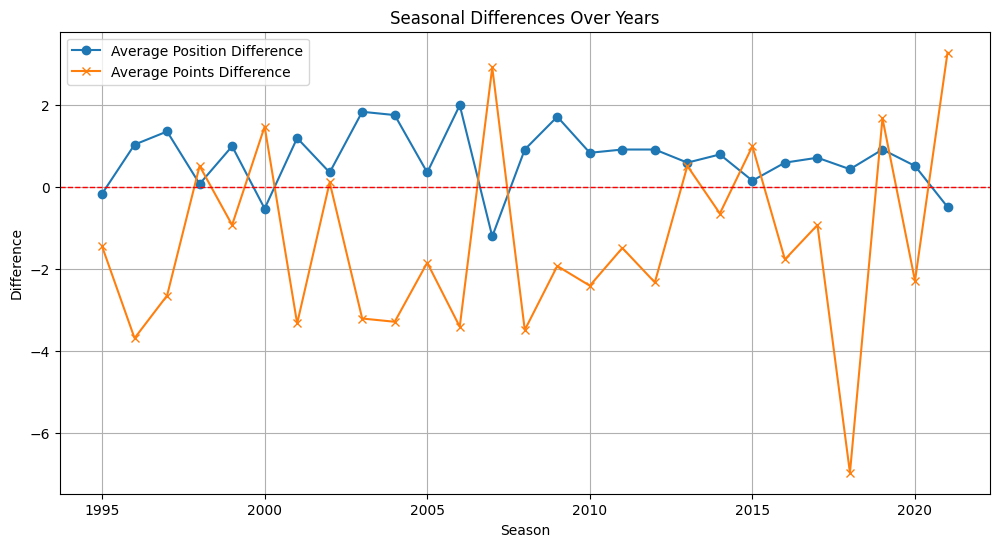

In [24]:
seasons = list(seasonal_differences_data.keys())
avg_position_diff = [seasonal_differences_data[season][0] for season in seasons]
avg_points_diff = [seasonal_differences_data[season][1] for season in seasons]

plt.figure(figsize=(12, 6))

plt.plot(seasons, avg_position_diff, label='Average Position Difference', marker='o')

plt.plot(seasons, avg_points_diff, label='Average Points Difference', marker='x')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

plt.title('Seasonal Differences Over Years')
plt.xlabel('Season')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)

plt.show()

# Conclusion & Discussion

###   -> Player movement is driven by factors beyond club financial power or success, leading to transfers between clubs of varying financial means and performance levels.
*   **To analyze this hypothesis, assortativity of the network is calculated. The network is disassortative. Meaning high spending clubs does not necessarly buy players from other high spending clubs. This suggests that players may transfer from low spending club to high spending club. Possibly from less successful club to more successful club, or vice-versa.**

###   -> Clubs that spends more fee and get higher fee from transfers involves more in transfer market interactions.
*   **To analyze this hypothesis, correlation between node strength and betweenness centrality is calculated. Node strength is the summation of in-degree and out-degree of node. There is a remarkable positive correlation between them. Node strength and betweenness centrality are also positively correlated in each seasonal network even the correlation coefficiant reduces comparing to the network including all seasons. This proves that the hypothesis above is true.**

###   -> Heavy trader clubs become more successful in next season.
*   **To analyze this hypothesis, an algorithm that correlates node strength and betweenness centrality of nodes is developed. Then, points difference and position difference of these nodes is fetched from the standings data which is previously scraped from web. Resulting graph is above. Generally, teams that are active in the transfer market for the current season increase their rankings but decrease their points in the next season. Therefore, the accuracy of this hypothesis is open to interpretation.**